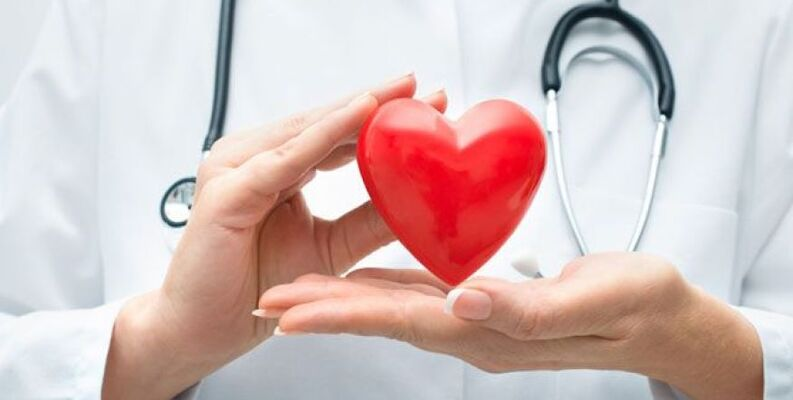

## Column Explanation

| **Feature**                   | **Description**                                                                                 |
|-------------------------------|-------------------------------------------------------------------------------------------------|
| **State**                     | USA States                                                                                      |
| **Sex**                       | Gender                                                                                          |
| **GeneralHealth**             | Health state                                                                                     |
| **PhysicalHealthDays**        | Working out days                                                                                |
| **MentalHealthDays**          | Psychological health treatment                                                                  |
| **LastCheckupTime**           | Last time to check up                                                                           |
| **PhysicalActivities**        | Workout                                                                                         |
| **SleepHours**                | Sleeping hours                                                                                  |
| **RemovedTeeth**              | Removed teeth or not                                                                            |
| **HadHeartAttack**            | Had heart attack or not                                                                         |
| **HadAngina**                 | Chest attack                                                                                    |
| **HadStroke**                 | Brain attack                                                                                    |
| **HadAsthma**                 | Asthma                                                                                          |
| **HadSkinCancer**             | Skin cancer                                                                                     |
| **HadCOPD**                   | Lungs problem                                                                                   |
| **HadDepressiveDisorder**     | Depression                                                                                      |
| **HadKidneyDisease**          | Kidney problem                                                                                  |
| **HadArthritis**              | Bone problems                                                                                   |
| **HadDiabetes**               | Diabetes                                                                                        |
| **DeafOrHardOfHearing**       | Deaf                                                                                           |
| **BlindOrVisionDifficulty**   | Sight problem / blind                                                                           |
| **DifficultyConcentrating**   | Concentrate problem                                                                             |
| **DifficultyWalking**         | Walking problem                                                                                 |
| **DifficultyDressingBathing** | Problem with getting dressed after a bath                                                       |
| **DifficultyErrands**         | Difficulty with errands                                                                         |
| **SmokerStatus**              | Smoker                                                                                          |
| **ECigaretteUsage**           | E-Smoke                                                                                         |
| **ChestScan**                 | Chest check                                                                                     |
| **RaceEthnicityCategory**     | (Black, white, Chinese) humans                                                                  |
| **AgeCategory**               | Age                                                                                            |
| **HeightInMeters**            | Height                                                                                          |
| **WeightInKilograms**         | Weight                                                                                          |
| **BMI**                       | Weight / Height                                                                                 |
| **AlcoholDrinkers**           | Alcohol drinkers                                                                                |
| **HIVTesting**                | Immunity system test                                                                            |
| **FluVaxLast12**              | Flu vaccine last 12 months                                                                      |
| **PneumoVaxEver**             | Taking Pneumo vaccine or not                                                                    |
| **TetanusLast10Tdap**         | Nervous system disease                                                                          |
| **HighRiskLastYear**          | In a risk last year                                                                             |
| **CovidPos**                  | Covid status                                                                                    |

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mlxtend.plotting import plot_confusion_matrix

# Statistical and machine learning tools
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('heart_2022_with_nans.csv')
df.head(10)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,62.60,22.96,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.63,73.48,27.81,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
8,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,NaN,No,...,1.70,NaN,NaN,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
9,Alabama,Female,Good,1.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.68,81.65,29.05,Yes,NaN,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [6]:
# checking for any Dummy Null in the Data Set
def check_dummy_null(data):
    columns = data.columns
    dum = ['?', '.', '/', '!', ',', '#','@', '*', '-']

    for col in columns:
        list = []
        flag = True
        list = data[col].unique()
        for d in dum:
            if d in list:
                flag = False
                print(col, '\n', d)
        if flag and col == columns[len(columns) - 1]:
            print('No dummy null Found !')



# Lowercase columns and the Data Set with customize the Date columns
def customize_data_set(data):
    # Change all column names to be lowercase and replace spaces with underscores
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    
    # Fixing data set rows to be all lowercase and replace spaces with underscores
    string_columns = data.select_dtypes(include=['object']).columns
    
    for col in string_columns:
        data[col] = data[col].str.lower().str.replace(' ', '_').str.strip()
    
    # Convert 'date' columns to datetime data type
    for col in data.columns:
        if 'date' in col:
            data[col] = pd.to_datetime(data[col], errors='coerce')
    
    return data
    

# Encoding the entire Data Set using Label Encoder
def encoding_data_set(data):
    objList = data.select_dtypes(include = "object").columns
    le = LabelEncoder()
    for feat in objList:
        data[feat] = le.fit_transform(data[feat].astype(str))

# colored Scatter plot 
def scatter_plot_with_colors(data, x_col, y_col):
    custom_palette = sns.color_palette("husl", len(house_edit1['type'].unique()))
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[x_col], y=data[y_col], hue=data['type'], palette=custom_palette)
    plt.title(f'Relationship between {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Type', loc='best')
    plt.show()


# Filling Null column with random values without effecting the Distrbution 
def fill_nulls_with_random(df, column_name):
    fill_list = df[column_name].dropna().values
    null_indices = df[column_name].isna()
    random_choices = pd.Series(np.random.choice(fill_list, size=null_indices.sum()), index=df[null_indices].index)
    df.loc[null_indices, column_name] = random_choices
    
    return df


# Extracting Yes / No Columns
def yes_no_columns(data):
    columns = data.columns.tolist()  
    yes_no_cols = []
    for col in columns:
        unique_values = data[col].unique()
        if 'yes' in unique_values or 'no' in unique_values and len(unique_values) == 3:
            yes_no_cols.append(col)
    
    return yes_no_cols

# Encoding Yes / No / - columns
def encode_yes_no(data):
    if data == 'no':
        return 0
    elif data == 'yes':
        return 1
    else:
        return 2

def null_rows(data, precentage = False):
    null_counts = data.isnull().sum(axis=1)
    rows = null_counts.value_counts().sort_index().reset_index().rename(columns={'index': 'null_count'})
    rows = rows.rename(columns={'count':'row_count'})
    if precentage:
        print((rows['row_count'] / data.shape[0])*100)
    return rows


# checking Correlation between features and target
def checking_corr_target(data, target, figure_size):
    corr_matrix = data.corr()
    
    target_corr = corr_matrix[target].sort_values(ascending=False)
    print(f"Correlations with {target}:\n", target_corr)

    plt.figure(figsize=figure_size)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.title(f'High Correlation Features Heatmap')
    plt.show()
    # Select features with high correlation with target
    high_corr_features = target_corr[abs(target_corr) > 0.5].index.tolist()
    high_corr_features.remove(target)  
    print(f"Selected features based on correlation with target {target}:", high_corr_features , 'which is correlated with more than 0.5')
    high_corr_matrix = data[high_corr_features].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'High Correlation Features Heatmap wit {target}')
    plt.show()




# Creating Scatter Plot between columns and Y 
def scatter_plot_data_set(data, columns, y_col):
    
    for col in columns:
        custom_palette = sns.color_palette("husl", len(data[col].unique()))
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[col], y=data[y_col], hue=data[col], palette=custom_palette)
        plt.title(f'Relationship between {col} and {y_col}')
        plt.xlabel(col)
        plt.ylabel(y_col)
        plt.show()



# Applying Linear Models
def linear_regression_model(model, data,target):
    x = data.drop(target , axis = 1).values
    y = data[target].values
    x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state= 42)
    
    model.fit(x_train, y_train)
    print('Training Acurecy' ,'\n', model.score(x_train, y_train),'\n')
    print('Testing Acurecy' ,'\n', model.score(x_test, y_test),'\n')
 
    print('Predicted Prices VS Real Price')
    y_pred = model.predict(x_test)
    pred = pd.DataFrame({"y_test" : y_test , "y_pred" : y_pred})

    train = pd.DataFrame(x_train)
    train['y_train'] = y_train
    
    print(f'Drawing the {target}')
    plt.figure(figsize=(18,12))
    plt.plot(pred[:500])
    plt.legend(['Actual' , "predicted"])

    return pred, train


# for Applying Linear Regression Models Evaluation with it statistical_summary 
def evaluating_linear_model(pred,train,statistical_summary = False):
    r2 = r2_score(pred['y_test'] ,pred['y_pred'])
    print('R-Squared: ',r2)
    mse = mean_squared_error(pred['y_test'] , pred['y_pred'])
    mape = mean_absolute_percentage_error(pred['y_test'] , pred['y_pred'])
    print('Mean Squared Error : ' , mse)
    print('Mean Absolute Precentage Error: ',mape)


    plt.figure(figsize=(10, 6))
    plt.scatter(pred['y_test'], pred['y_pred'], alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([pred['y_test'].min(), pred['y_test'].max()], [pred['y_test'].min(), pred['y_test'].max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted Prices')
    plt.show()
    
    if statistical_summary:
        x_train = train.drop('y_train' , axis = 1).values
        x2 = sm.add_constant(x_train)
        est = sm.OLS(train['y_train'] , x2)
        est2 = est.fit()
        print(est2.summary())


# function for classification models and it is evaluation (can be used for smote, feature_selection used (CHI2) , Grid Search)
def classification_model(model, model_name, data, target, smote=False, feature_selection=False, param_grid=None, k_features=13, results_df=None):
    # Prepare data
    X = data.drop(columns=target).values
    y = data[target].values
    
    # Feature selection
    if feature_selection:
        X = SelectKBest(chi2, k=k_features).fit_transform(X, y)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Apply SMOTE
    if smote:
        smt = SMOTE(random_state=42)
        X_train, y_train = smt.fit_resample(X_train, y_train)
    
    # Hyperparameter tuning
    if param_grid:
        model = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    
    # Train model
    model.fit(X_train, y_train)
    
    # If GridSearchCV is used, get the best estimator
    if isinstance(model, GridSearchCV):
        best_model = model.best_estimator_
    else:
        best_model = model
    
    # Evaluate model
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    training_accuracy = accuracy_score(y_train, y_pred_train)
    testing_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, zero_division=0)
    recall = recall_score(y_test, y_pred_test, zero_division=0)
    
    # Print evaluation metrics
    print('Training Accuracy:', training_accuracy)
    print('Testing Accuracy:', testing_accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('----------------------------------------------------------')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(best_model, X_test, y_test, display_labels=[f'No {target}', target], cmap='viridis')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification report
    print('----------------------------------------------------------')
    print(classification_report(y_test, y_pred_test))
    
    # Best parameters if GridSearchCV is used
    if param_grid:
        print('Best Parameters:', model.best_params_)
    

    
    if results_df is None:
            results_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall'])
    
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Training Accuracy': [training_accuracy],
        'Testing Accuracy': [testing_accuracy],
        'Precision': [precision],
        'Recall': [recall]
    })

    # Append the new row to the DataFrame using pd.concat
    results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    return results_df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [10]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [11]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Data Preprocessing

In [16]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

- precentage of how many nulls in each rows

In [18]:
null_rows(df,precentage=True)

0     55.269448
1     19.665403
2      8.360891
3      3.595563
4      1.585148
5      0.870753
6      0.798415
7      0.656884
8      0.976340
9      0.503222
10     1.371953
11     0.493786
12     0.389547
13     0.370227
14     0.299237
15     0.289577
16     0.318782
17     0.101094
18     0.197694
19     2.940027
20     0.635093
21     0.187360
22     0.053917
23     0.021342
24     0.007638
25     0.004942
26     0.003145
27     0.002471
28     0.000674
29     0.003594
30     0.002471
31     0.004044
32     0.001797
33     0.001573
34     0.001573
35     0.004718
36     0.002022
37     0.002920
38     0.004718
Name: row_count, dtype: float64


,null_count,row_count
0,0,246022
1,1,87537
2,2,37217
3,3,16005
4,4,7056
5,5,3876
6,6,3554
7,7,2924
8,8,4346
9,9,2240


- customizing the data set 

In [21]:
customize_data_set(df)

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,physicalactivities,sleephours,removedteeth,hadheartattack,...,heightinmeters,weightinkilograms,bmi,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,tetanuslast10tdap,highrisklastyear,covidpos
0,alabama,female,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,no,8.0,NaN,no,...,NaN,NaN,NaN,no,no,yes,no,"yes,_received_tetanus_shot_but_not_sure_what_type",no,no
1,alabama,female,excellent,0.0,0.0,NaN,no,6.0,NaN,no,...,1.60,68.04,26.57,no,no,no,no,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
2,alabama,female,very_good,2.0,3.0,within_past_year_(anytime_less_than_12_months_...,yes,5.0,NaN,no,...,1.57,63.50,25.61,no,no,no,no,NaN,no,yes
3,alabama,female,excellent,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,yes,7.0,NaN,no,...,1.65,63.50,23.30,no,no,yes,yes,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
4,alabama,female,fair,2.0,0.0,within_past_year_(anytime_less_than_12_months_...,yes,9.0,NaN,no,...,1.57,53.98,21.77,yes,no,no,yes,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,virgin_islands,female,good,0.0,3.0,within_past_2_years_(1_year_but_less_than_2_ye...,yes,6.0,none_of_them,no,...,1.65,69.85,25.63,NaN,yes,no,no,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,yes
445128,virgin_islands,female,excellent,2.0,2.0,within_past_year_(anytime_less_than_12_months_...,yes,7.0,none_of_them,no,...,1.70,83.01,28.66,no,yes,yes,no,"yes,_received_tetanus_shot_but_not_sure_what_type",no,no
445129,virgin_islands,female,poor,30.0,30.0,5_or_more_years_ago,no,5.0,1_to_5,no,...,1.70,49.90,17.23,NaN,no,no,no,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
445130,virgin_islands,male,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,no,5.0,none_of_them,yes,...,1.83,108.86,32.55,no,yes,yes,yes,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,yes


In [22]:
data = df.copy()

- Starting removing Nulls from the Data Set

In [24]:
data.duplicated().sum()


0

In [25]:
data.drop_duplicates(inplace=True)

In [30]:
data.dropna(thresh = len(df.columns) - 15, inplace=True) # keeping if there is 25 values in a row
data.shape

(425073, 40)

In [32]:
data.isna().sum()

state                            0
sex                              0
generalhealth                 1047
physicalhealthdays           10076
mentalhealthdays              8361
lastcheckuptime               7564
physicalactivities             915
sleephours                    4948
removedteeth                 10383
hadheartattack                2629
hadangina                     3954
hadstroke                     1262
hadasthma                     1480
hadskincancer                 2782
hadcopd                       1861
haddepressivedisorder         2423
hadkidneydisease              1596
hadarthritis                  2276
haddiabetes                    809
deaforhardofhearing           1566
blindorvisiondifficulty       2127
difficultyconcentrating       4531
difficultywalking             4191
difficultydressingbathing     4053
difficultyerrands             5767
smokerstatus                 15496
ecigaretteusage              15700
chestscan                    36035
raceethnicitycategor

<Axes: >

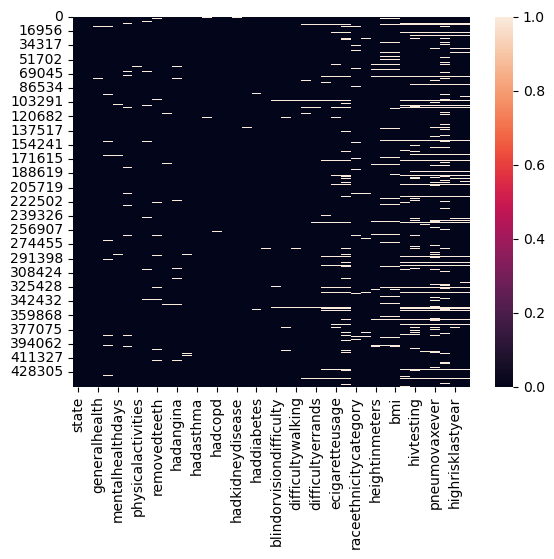

In [34]:
sns.heatmap(data.isna())

- before continue removing we start to search for any relation between columns to fill them first

In [37]:
data['bmi'] = data['weightinkilograms'] / (df['heightinmeters'] ** 2)

- i have now 6805 rows is missing 

In [39]:
bmi = data[['heightinmeters','weightinkilograms','bmi']]

- checking if all 3 columns are null together

In [41]:
test = bmi[bmi['weightinkilograms'].isna()  & bmi['heightinmeters'].isna()]
test

,heightinmeters,weightinkilograms,bmi
0,NaN,NaN,NaN
96,NaN,NaN,NaN
260,NaN,NaN,NaN
371,NaN,NaN,NaN
510,NaN,NaN,NaN
...,...,...,...
443941,NaN,NaN,NaN
444411,NaN,NaN,NaN
444474,NaN,NaN,NaN
444871,NaN,NaN,NaN


- dropping these columns as these have the smalles precentage of Null values
- in this data set we have a problem if we removed all columns that contains less than 5% nulls we will delete almost 44% of the data set
- i decided to delete nulls from columns which contain less than 1% nulls

In [43]:
data.dropna(subset=['generalhealth','physicalactivities','hadstroke','hadasthma','hadcopd','hadkidneydisease','deaforhardofhearing',
                   'haddiabetes'], inplace=True)

In [45]:
test = pd.DataFrame((data.isna().sum() / data.shape[0]) * 100, columns=['prob'])

- starting to extract the rest of the null columns to randomly fill them

In [47]:
null_columns = test[test['prob']>0].reset_index()
null_columns

,index,prob
0,physicalhealthdays,2.214377
1,mentalhealthdays,1.829833
2,lastcheckuptime,1.698203
3,sleephours,1.060745
4,removedteeth,2.331329
5,hadheartattack,0.508234
6,hadangina,0.788340
7,hadskincancer,0.576094
8,haddepressivedisorder,0.483929
9,hadarthritis,0.441576


In [49]:
data.shape

(415557, 40)

In [51]:
null_rows(data,precentage=True)

0     59.524446
1     20.174609
2      8.327859
3      3.478945
4      1.484514
5      0.796521
6      0.772457
7      0.651415
8      1.005157
9      0.494998
10     1.445530
11     0.494758
12     0.383582
13     0.374918
14     0.299117
15     0.291175
Name: row_count, dtype: float64


,null_count,row_count
0,0,247358
1,1,83837
2,2,34607
3,3,14457
4,4,6169
5,5,3310
6,6,3210
7,7,2707
8,8,4177
9,9,2057


In [53]:
data.isna().sum()

state                            0
sex                              0
generalhealth                    0
physicalhealthdays            9202
mentalhealthdays              7604
lastcheckuptime               7057
physicalactivities               0
sleephours                    4408
removedteeth                  9688
hadheartattack                2112
hadangina                     3276
hadstroke                        0
hadasthma                        0
hadskincancer                 2394
hadcopd                          0
haddepressivedisorder         2011
hadkidneydisease                 0
hadarthritis                  1835
haddiabetes                      0
deaforhardofhearing              0
blindorvisiondifficulty       1827
difficultyconcentrating       4126
difficultywalking             3944
difficultydressingbathing     3864
difficultyerrands             5487
smokerstatus                 14988
ecigaretteusage              15190
chestscan                    34671
raceethnicitycategor

In [55]:
for col in null_columns['index']:
    fill_nulls_with_random(data,col)

In [56]:
data.isna().sum()

state                        0
sex                          0
generalhealth                0
physicalhealthdays           0
mentalhealthdays             0
lastcheckuptime              0
physicalactivities           0
sleephours                   0
removedteeth                 0
hadheartattack               0
hadangina                    0
hadstroke                    0
hadasthma                    0
hadskincancer                0
hadcopd                      0
haddepressivedisorder        0
hadkidneydisease             0
hadarthritis                 0
haddiabetes                  0
deaforhardofhearing          0
blindorvisiondifficulty      0
difficultyconcentrating      0
difficultywalking            0
difficultydressingbathing    0
difficultyerrands            0
smokerstatus                 0
ecigaretteusage              0
chestscan                    0
raceethnicitycategory        0
agecategory                  0
heightinmeters               0
weightinkilograms            0
bmi     

- number of data removed 

In [59]:
100 - (data.shape[0]/df.shape[0]) * 100

6.644096582586741

## Analysis and Visualization

In [1368]:
data

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,physicalactivities,sleephours,removedteeth,hadheartattack,...,heightinmeters,weightinkilograms,bmi,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,tetanuslast10tdap,highrisklastyear,covidpos
0,alabama,female,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,no,8.0,all,no,...,1.70,53.52,31.208181,no,no,yes,no,"yes,_received_tetanus_shot_but_not_sure_what_type",no,no
1,alabama,female,excellent,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,no,6.0,1_to_5,no,...,1.60,68.04,26.578125,no,no,no,no,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
2,alabama,female,very_good,2.0,3.0,within_past_year_(anytime_less_than_12_months_...,yes,5.0,none_of_them,no,...,1.57,63.50,25.761694,no,no,no,no,"yes,_received_tetanus_shot_but_not_sure_what_type",no,yes
3,alabama,female,excellent,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,yes,7.0,none_of_them,no,...,1.65,63.50,23.324151,no,no,yes,yes,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
4,alabama,female,fair,2.0,0.0,within_past_year_(anytime_less_than_12_months_...,yes,9.0,none_of_them,no,...,1.57,53.98,21.899469,yes,no,no,yes,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,virgin_islands,female,good,0.0,3.0,within_past_2_years_(1_year_but_less_than_2_ye...,yes,6.0,none_of_them,no,...,1.65,69.85,25.656566,no,yes,no,no,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,yes
445128,virgin_islands,female,excellent,2.0,2.0,within_past_year_(anytime_less_than_12_months_...,yes,7.0,none_of_them,no,...,1.70,83.01,28.723183,no,yes,yes,no,"yes,_received_tetanus_shot_but_not_sure_what_type",no,no
445129,virgin_islands,female,poor,30.0,30.0,5_or_more_years_ago,no,5.0,1_to_5,no,...,1.70,49.90,17.266436,yes,no,no,no,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,no
445130,virgin_islands,male,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,no,5.0,none_of_them,yes,...,1.83,108.86,32.506196,no,yes,yes,yes,"no,_did_not_receive_any_tetanus_shot_in_the_pa...",no,yes


<Axes: xlabel='hadheartattack', ylabel='count'>

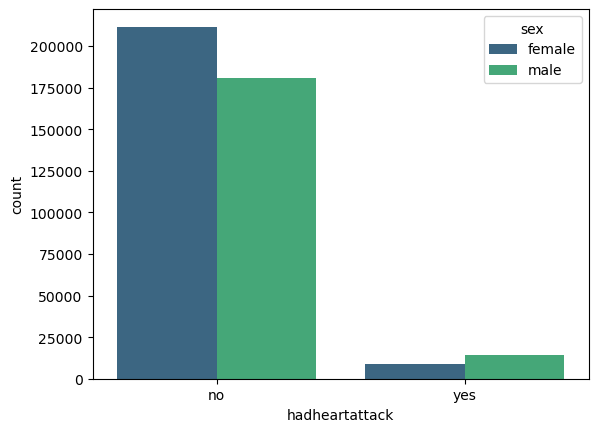

In [300]:
sns.countplot(x='hadheartattack', hue='sex', data=data, palette="viridis")

<Axes: xlabel='alcoholdrinkers', ylabel='count'>

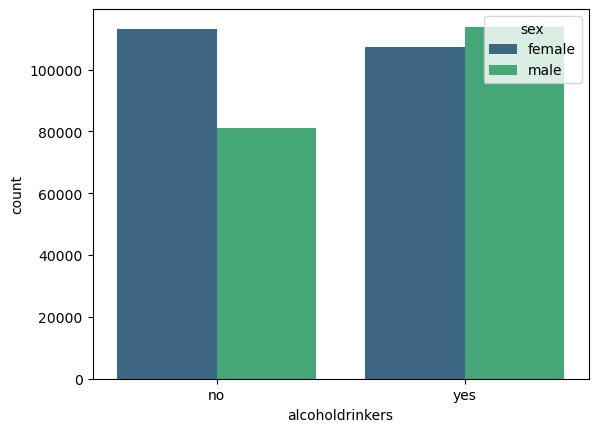

In [302]:
sns.countplot(x=data['alcoholdrinkers'], hue='sex', data=data, palette="viridis")

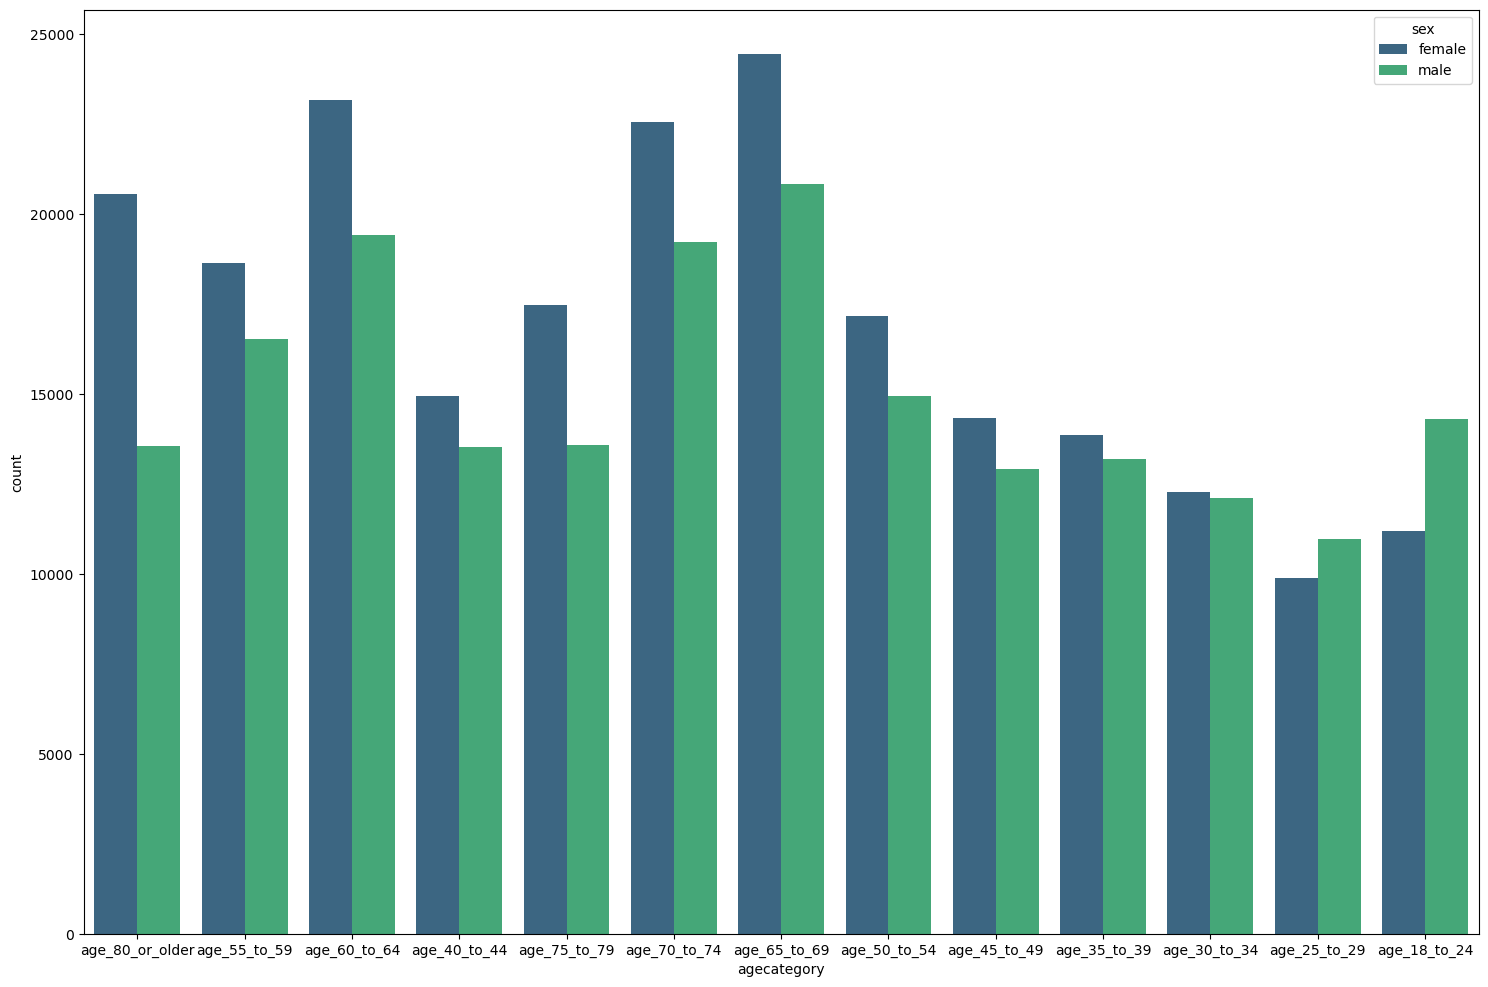

In [320]:
plt.figure(figsize=(18,12))
sns.countplot(x=data['agecategory'], hue='sex', data=data, palette="viridis")
plt.show()

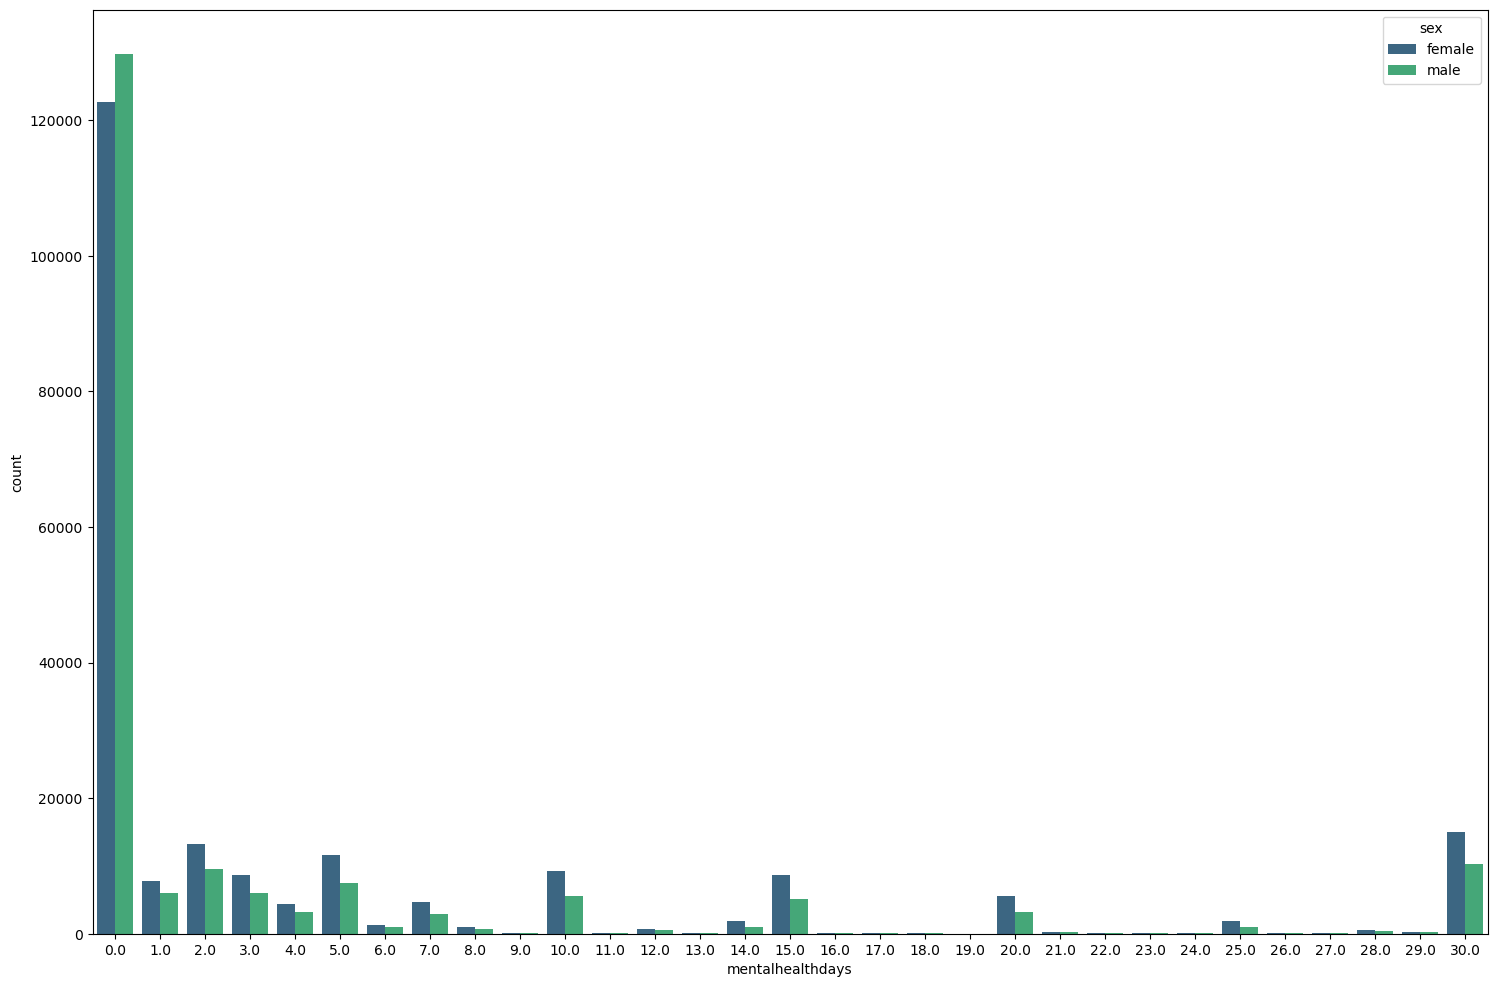

In [324]:
plt.figure(figsize=(18,12))
sns.countplot(x=data['mentalhealthdays'], hue='sex', data=data, palette="viridis")
plt.show()

<Axes: xlabel='physicalactivities', ylabel='count'>

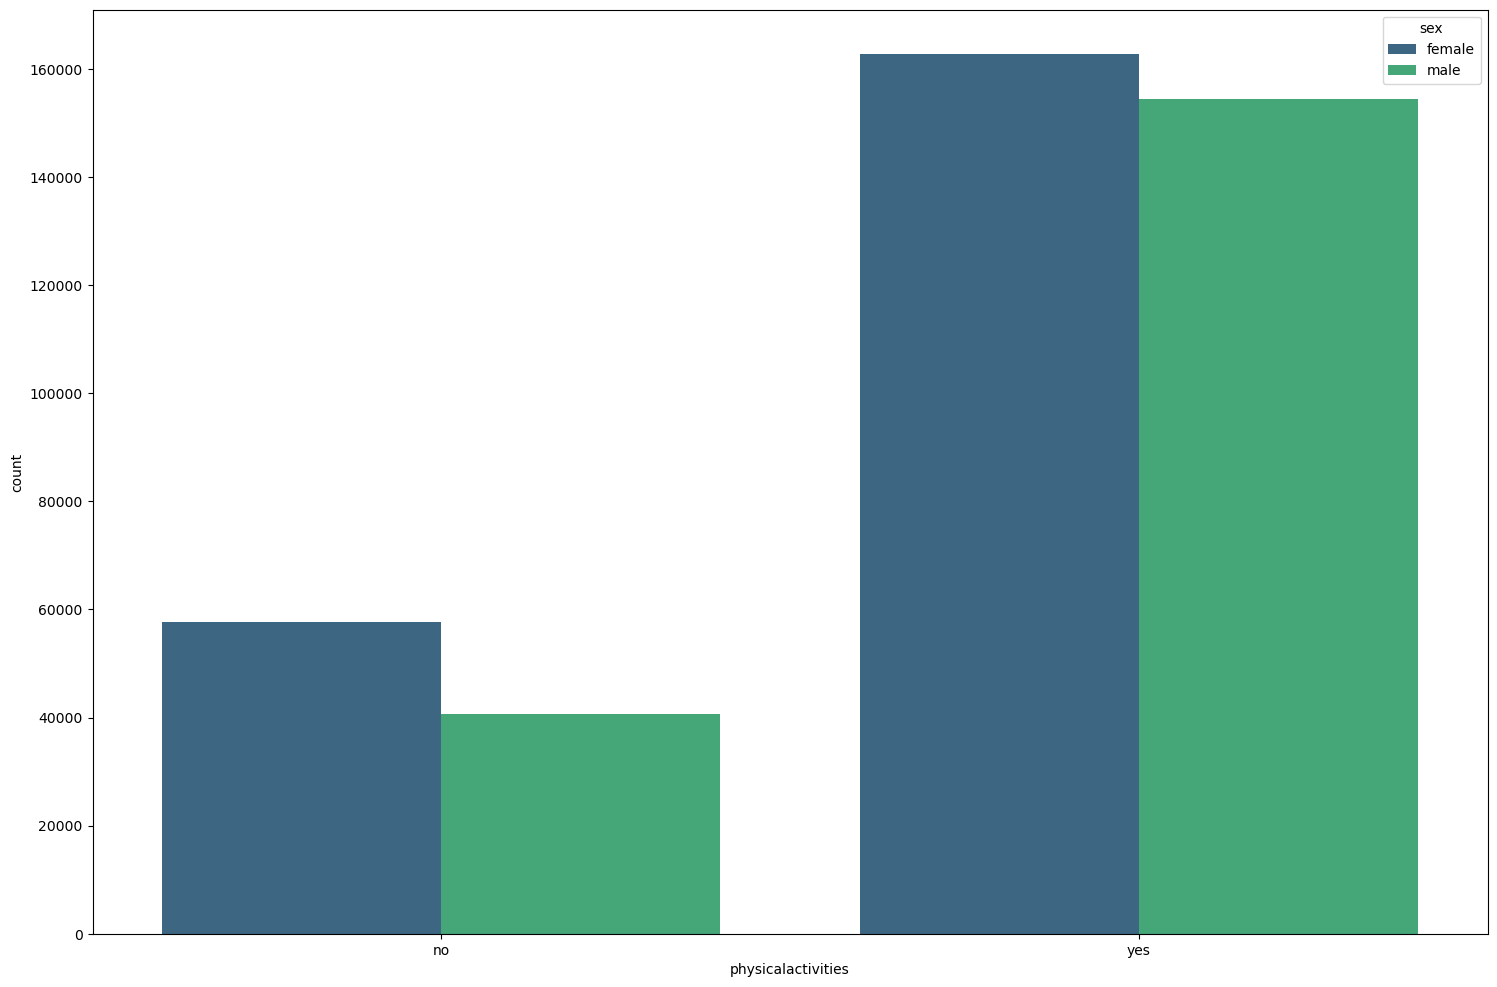

In [326]:
plt.figure(figsize=(18,12))
sns.countplot(x=data['physicalactivities'], hue='sex', data=data, palette="viridis")

<Axes: xlabel='lastcheckuptime', ylabel='count'>

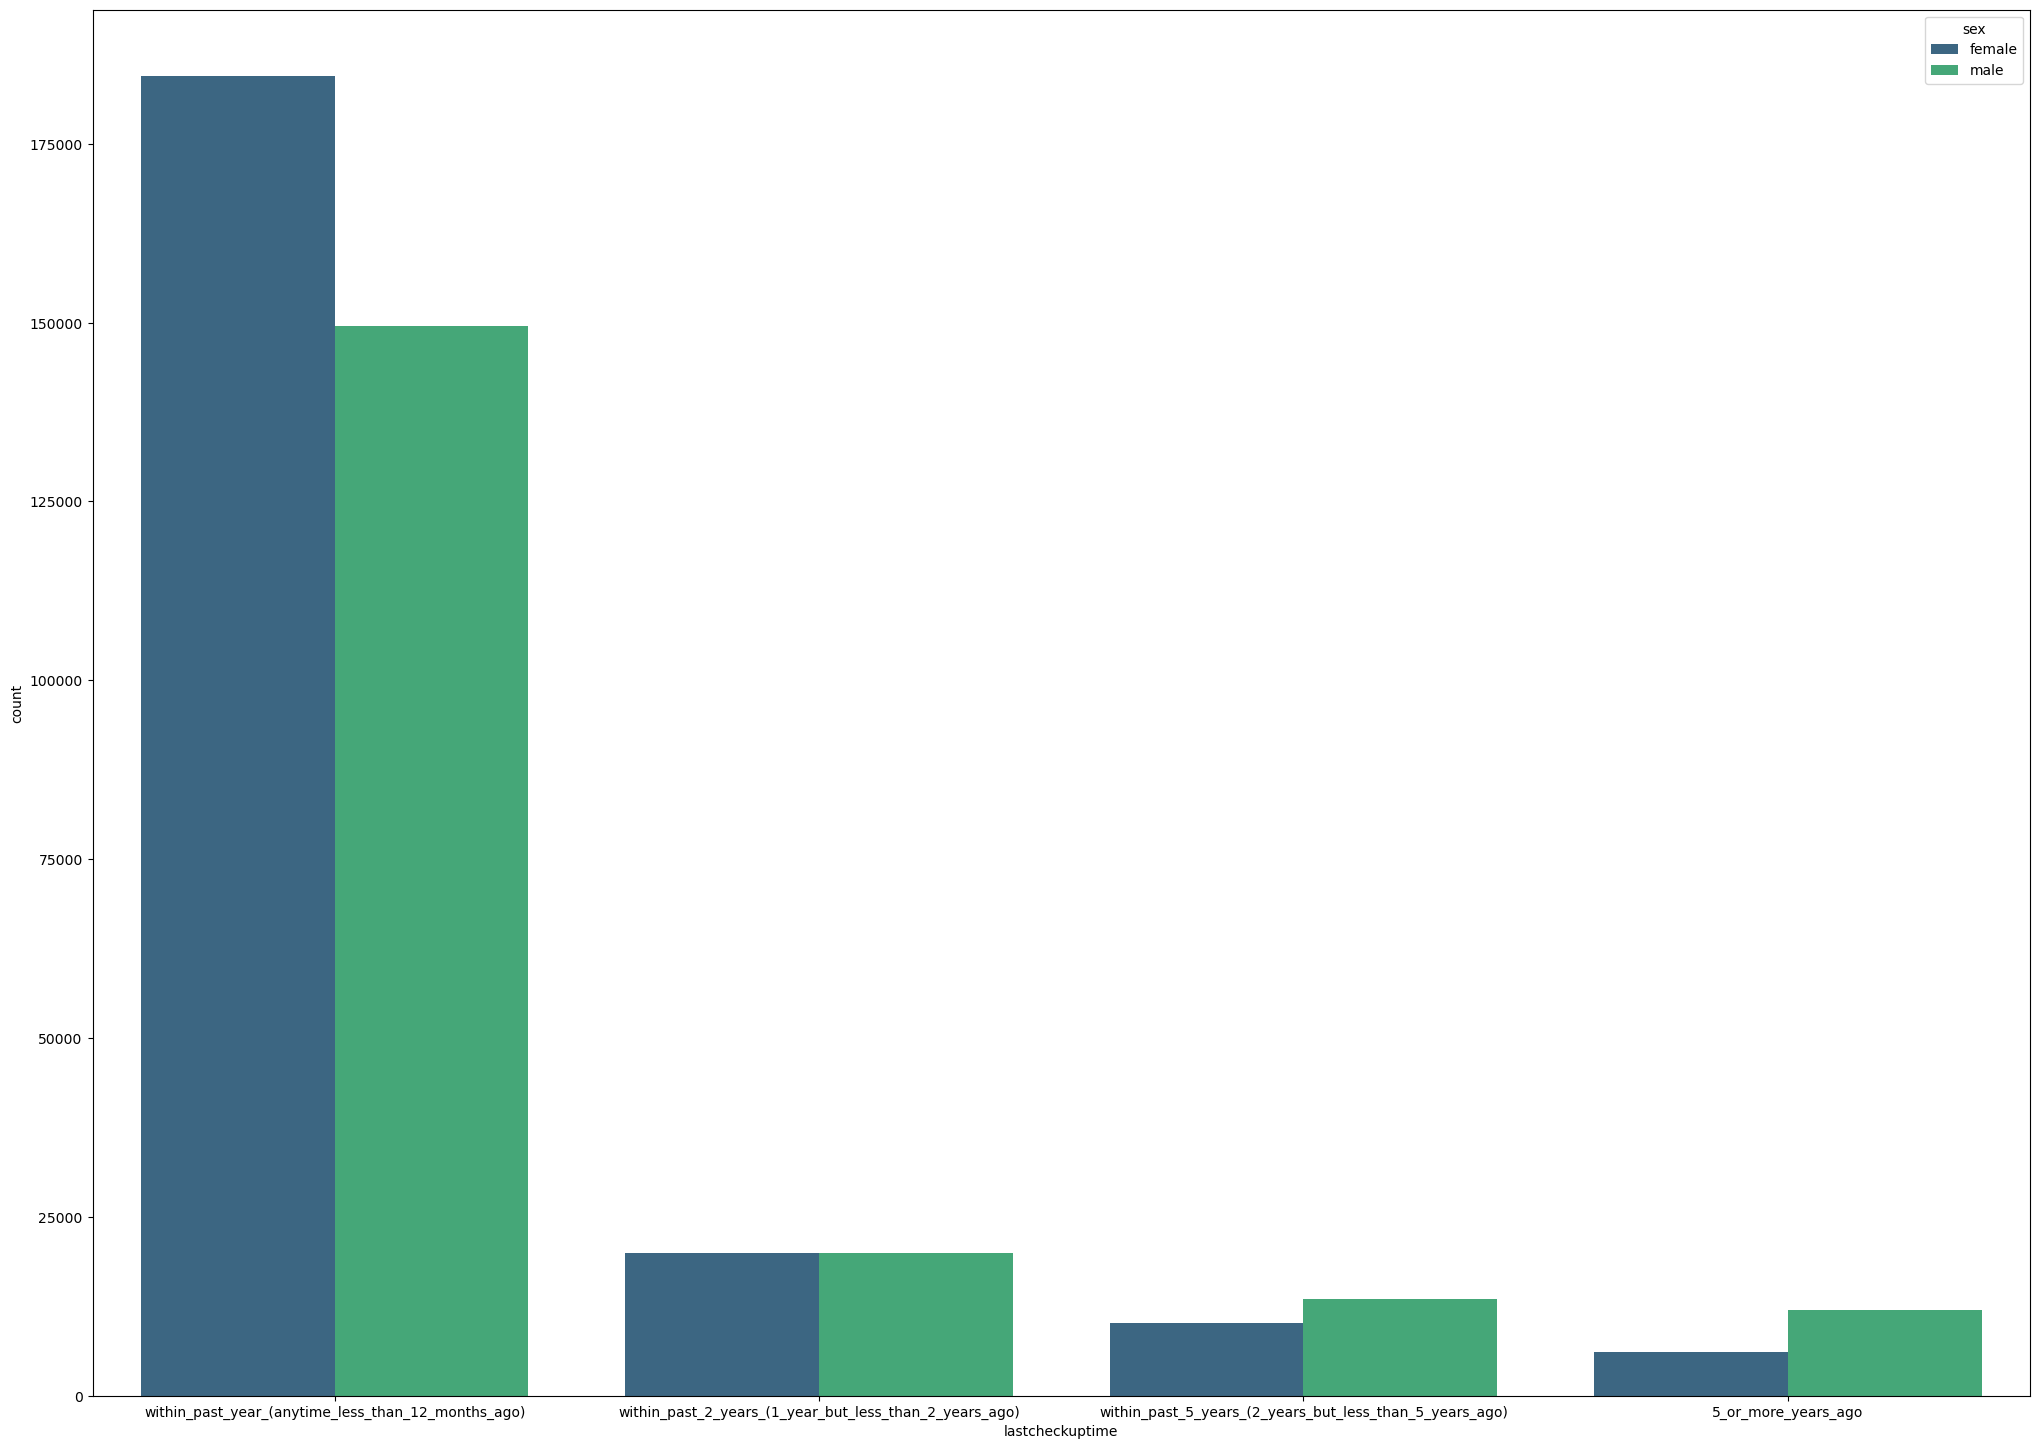

In [334]:
plt.figure(figsize=(25,18))

sns.countplot(x=data['lastcheckuptime'], hue='sex', data=data, palette="viridis")

<Axes: xlabel='generalhealth', ylabel='count'>

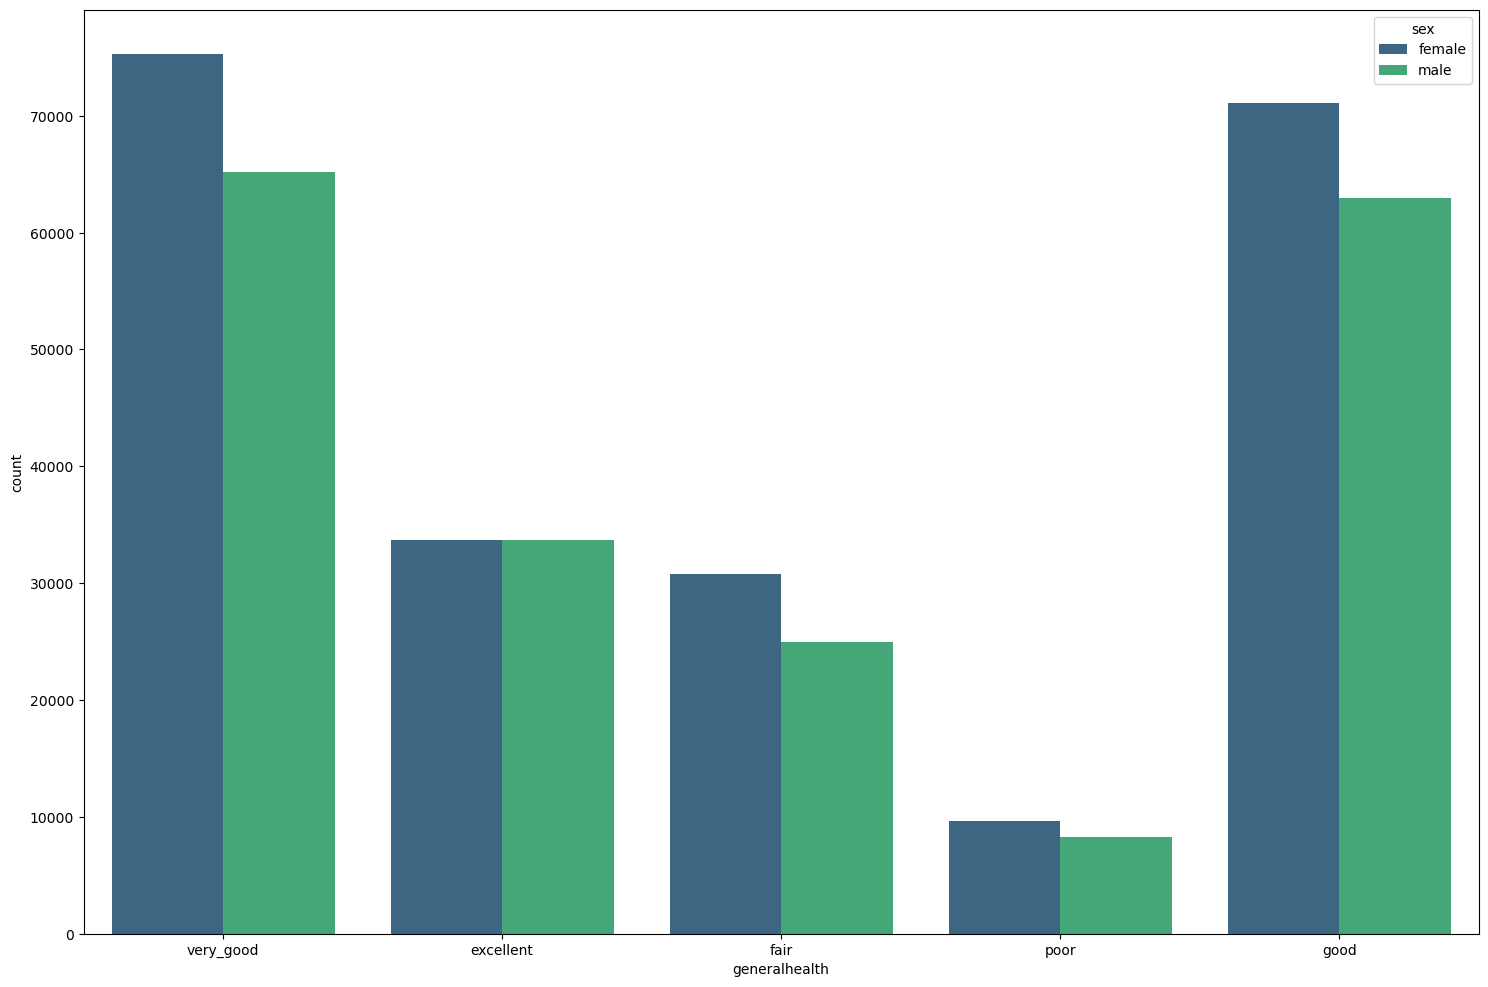

In [336]:
plt.figure(figsize=(18,12))
sns.countplot(x=data['generalhealth'], hue='sex', data=data, palette="viridis")

<Axes: xlabel='weightinkilograms', ylabel='heightinmeters'>

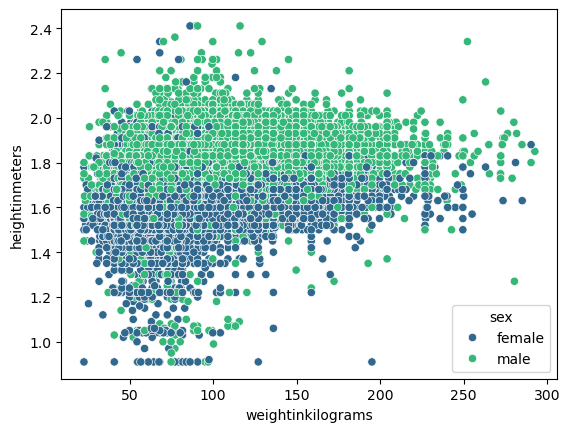

In [344]:
sns.scatterplot(x=data['weightinkilograms'], y=data['heightinmeters'], hue='sex',data=data, palette="viridis")

In [382]:
states = data.groupby('state')[['sex','hadheartattack']].value_counts().reset_index().sort_values('count', ascending=False)
states = pd.DataFrame(states)

In [402]:
male_state = states[states['hadheartattack'] == 'yes'].head(5)
male_state

,state,sex,hadheartattack,count
202,washington,male,yes,724
146,ohio,male,yes,641
38,florida,male,yes,536
86,maryland,male,yes,519
98,minnesota,male,yes,481


In [404]:
female_state = states[(states['hadheartattack'] == 'yes') & (states['sex'] == 'female')].head(5)
female_state

,state,sex,hadheartattack,count
203,washington,female,yes,413
147,ohio,female,yes,411
39,florida,female,yes,394
183,texas,female,yes,304
135,new_york,female,yes,301


In [410]:
male_state.drop(columns=['hadheartattack'],inplace=True)
female_state.drop(columns=['hadheartattack'],inplace=True)
compine = pd.concat([male_state,female_state])
compine

,state,sex,count
202,washington,male,724
146,ohio,male,641
38,florida,male,536
86,maryland,male,519
98,minnesota,male,481
203,washington,female,413
147,ohio,female,411
39,florida,female,394
183,texas,female,304
135,new_york,female,301


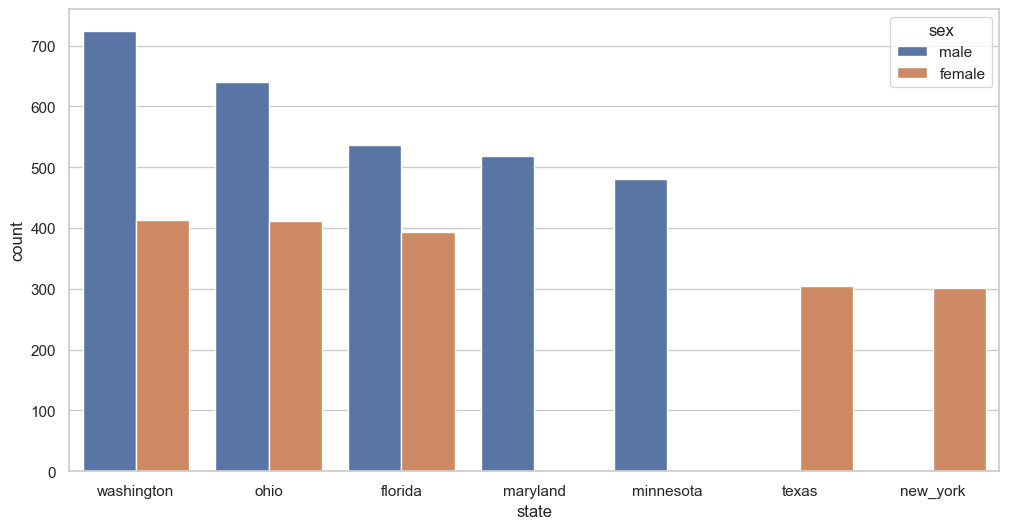

In [412]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='count', hue='sex', data=compine)
plt.show()

In [497]:
state = data.groupby('state')[['hadheartattack','sex']].value_counts().reset_index()
state = state[state['hadheartattack'] == 'yes'].sort_values('count',ascending=False)
state

,state,hadheartattack,sex,count
202,washington,yes,male,724
146,ohio,yes,male,641
38,florida,yes,male,536
86,maryland,yes,male,519
98,minnesota,yes,male,481
...,...,...,...,...
34,district_of_columbia,yes,male,52
47,guam,yes,female,49
35,district_of_columbia,yes,female,45
194,virgin_islands,yes,male,28


In [523]:
state['state'] = state['state'].str.title()

state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
state['state_abbr'] = state['state'].map(state_abbr)
aggregated_df = state.pivot_table(index=['state','state_abbr'], columns='sex', values='count', aggfunc='sum').reset_index()

# Calculate the total count
aggregated_df['total'] = aggregated_df['male'] + aggregated_df['female']


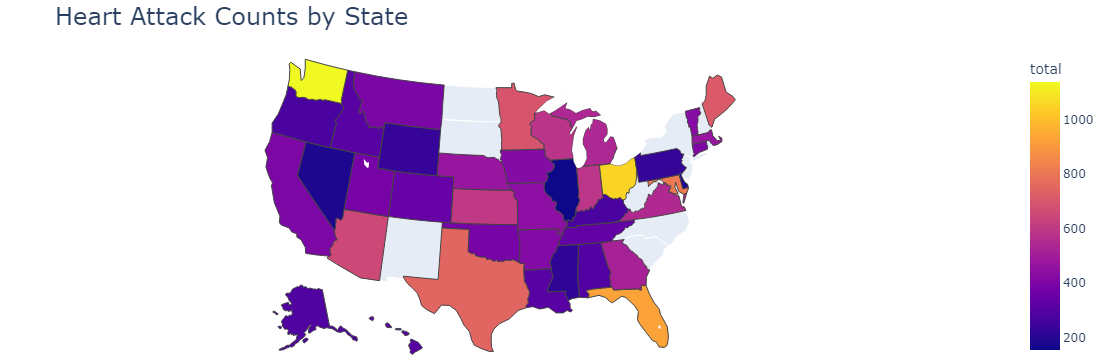

In [525]:
fig = px.choropleth(
    aggregated_df,
    locations='state_abbr',
    locationmode='USA-states',
    color='total',
    hover_data={'state':True,'male': True, 'female': True, 'total': True},
    scope='usa',
    title='Heart Attack Counts by State'
)

# Update the layout for better aesthetics
fig.update_layout(
    title_font_size=24,
    margin={"r": 0, "t": 50, "l": 0, "b": 0}
)

# Show the plot
fig.show()

In [527]:
data.columns

Index(['state', 'sex', 'generalhealth', 'physicalhealthdays',
       'mentalhealthdays', 'lastcheckuptime', 'physicalactivities',
       'sleephours', 'removedteeth', 'hadheartattack', 'hadangina',
       'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd',
       'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
       'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
       'difficultyconcentrating', 'difficultywalking',
       'difficultydressingbathing', 'difficultyerrands', 'smokerstatus',
       'ecigaretteusage', 'chestscan', 'raceethnicitycategory', 'agecategory',
       'heightinmeters', 'weightinkilograms', 'bmi', 'alcoholdrinkers',
       'hivtesting', 'fluvaxlast12', 'pneumovaxever', 'tetanuslast10tdap',
       'highrisklastyear', 'covidpos'],
      dtype='object')

In [595]:
heart = data.groupby('hadheartattack')[['haddepressivedisorder','mentalhealthdays','physicalactivities','covidpos'
                                     ,'alcoholdrinkers','pneumovaxever']].value_counts().reset_index()
heart

,hadheartattack,haddepressivedisorder,mentalhealthdays,physicalactivities,covidpos,alcoholdrinkers,pneumovaxever,count
0,no,no,0.0,yes,no,yes,no,38481
1,no,no,0.0,yes,no,no,no,29974
2,no,no,0.0,yes,no,yes,yes,27281
3,no,no,0.0,yes,no,no,yes,24201
4,no,no,0.0,yes,yes,yes,no,17315
...,...,...,...,...,...,...,...,...
2013,yes,yes,28.0,yes,yes,yes,no,1
2014,yes,yes,29.0,no,no,no,no,1
2015,yes,yes,29.0,no,no,yes,no,1
2016,yes,yes,29.0,no,tested_positive_using_home_test_without_a_heal...,yes,yes,1


In [605]:
dep = heart[(heart['covidpos'] == 'yes') & (heart['haddepressivedisorder'] == 'yes')]

In [607]:
dep[['hadheartattack','covidpos','haddepressivedisorder']].value_counts()

hadheartattack  covidpos  haddepressivedisorder
no              yes       yes                      232
yes             yes       yes                      151
Name: count, dtype: int64

## Encoding

In [61]:
data['hadheartattack'].unique()

array(['no', 'yes'], dtype=object)

In [63]:
data_encoding = data.copy()

In [65]:
columns = yes_no_columns(data_encoding)
columns

['physicalactivities',
 'hadheartattack',
 'hadangina',
 'hadstroke',
 'hadasthma',
 'hadskincancer',
 'hadcopd',
 'haddepressivedisorder',
 'hadkidneydisease',
 'hadarthritis',
 'haddiabetes',
 'deaforhardofhearing',
 'blindorvisiondifficulty',
 'difficultyconcentrating',
 'difficultywalking',
 'difficultydressingbathing',
 'difficultyerrands',
 'chestscan',
 'alcoholdrinkers',
 'hivtesting',
 'fluvaxlast12',
 'pneumovaxever',
 'highrisklastyear',
 'covidpos']

In [67]:
enc_data = data_encoding[columns]
enc_data

,physicalactivities,hadheartattack,hadangina,hadstroke,hadasthma,hadskincancer,hadcopd,haddepressivedisorder,hadkidneydisease,hadarthritis,...,difficultywalking,difficultydressingbathing,difficultyerrands,chestscan,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear,covidpos
0,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,yes,no,no,no
1,no,no,no,no,no,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
2,yes,no,no,no,no,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
3,yes,no,no,no,yes,no,no,no,no,yes,...,no,no,no,yes,no,no,yes,yes,no,no
4,yes,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,no,no,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,yes,no,no,no,yes,no,no,yes,no,no,...,no,no,no,yes,yes,yes,no,no,no,yes
445128,yes,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,yes,yes,no,no,no
445129,no,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,no,no,no,no,no
445130,no,yes,no,no,yes,no,no,no,no,no,...,no,no,no,yes,no,yes,yes,yes,no,yes


In [69]:
enc_data = enc_data.applymap(encode_yes_no)

In [70]:
data_encoding.drop(columns=columns,inplace=True)


In [71]:
data_encoding

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,sleephours,removedteeth,smokerstatus,ecigaretteusage,raceethnicitycategory,agecategory,heightinmeters,weightinkilograms,bmi,tetanuslast10tdap
0,alabama,female,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,8.0,none_of_them,never_smoked,not_at_all_(right_now),"white_only,_non-hispanic",age_80_or_older,1.78,102.06,25.770105,"yes,_received_tetanus_shot_but_not_sure_what_type"
1,alabama,female,excellent,0.0,0.0,within_past_2_years_(1_year_but_less_than_2_ye...,6.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",age_80_or_older,1.60,68.04,26.578125,"no,_did_not_receive_any_tetanus_shot_in_the_pa..."
2,alabama,female,very_good,2.0,3.0,within_past_year_(anytime_less_than_12_months_...,5.0,1_to_5,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",age_55_to_59,1.57,63.50,25.761694,"no,_did_not_receive_any_tetanus_shot_in_the_pa..."
3,alabama,female,excellent,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,7.0,none_of_them,current_smoker_-_now_smokes_some_days,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",age_75_to_79,1.65,63.50,23.324151,"no,_did_not_receive_any_tetanus_shot_in_the_pa..."
4,alabama,female,fair,2.0,0.0,within_past_year_(anytime_less_than_12_months_...,9.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",age_40_to_44,1.57,53.98,21.899469,"no,_did_not_receive_any_tetanus_shot_in_the_pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,virgin_islands,female,good,0.0,3.0,within_past_2_years_(1_year_but_less_than_2_ye...,6.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"black_only,_non-hispanic",age_18_to_24,1.65,69.85,25.656566,"no,_did_not_receive_any_tetanus_shot_in_the_pa..."
445128,virgin_islands,female,excellent,2.0,2.0,within_past_year_(anytime_less_than_12_months_...,7.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"black_only,_non-hispanic",age_50_to_54,1.70,83.01,28.723183,"yes,_received_tetanus_shot_but_not_sure_what_type"
445129,virgin_islands,female,poor,30.0,30.0,5_or_more_years_ago,5.0,1_to_5,current_smoker_-_now_smokes_every_day,use_them_some_days,"black_only,_non-hispanic",age_65_to_69,1.70,49.90,17.266436,"no,_did_not_receive_any_tetanus_shot_in_the_pa..."
445130,virgin_islands,male,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,5.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"black_only,_non-hispanic",age_70_to_74,1.83,108.86,32.506196,"no,_did_not_receive_any_tetanus_shot_in_the_pa..."


In [75]:
data_encoding = pd.concat([data_encoding,enc_data],axis=1)
data_encoding

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,sleephours,removedteeth,smokerstatus,ecigaretteusage,...,difficultywalking,difficultydressingbathing,difficultyerrands,chestscan,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear,covidpos
0,alabama,female,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,8.0,none_of_them,never_smoked,not_at_all_(right_now),...,0,0,0,0,0,0,1,0,0,0
1,alabama,female,excellent,0.0,0.0,within_past_2_years_(1_year_but_less_than_2_ye...,6.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,...,0,0,0,0,0,0,0,0,0,0
2,alabama,female,very_good,2.0,3.0,within_past_year_(anytime_less_than_12_months_...,5.0,1_to_5,never_smoked,never_used_e-cigarettes_in_my_entire_life,...,0,0,0,0,0,0,0,0,0,1
3,alabama,female,excellent,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,7.0,none_of_them,current_smoker_-_now_smokes_some_days,never_used_e-cigarettes_in_my_entire_life,...,0,0,0,1,0,0,1,1,0,0
4,alabama,female,fair,2.0,0.0,within_past_year_(anytime_less_than_12_months_...,9.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,virgin_islands,female,good,0.0,3.0,within_past_2_years_(1_year_but_less_than_2_ye...,6.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,...,0,0,0,1,1,1,0,0,0,1
445128,virgin_islands,female,excellent,2.0,2.0,within_past_year_(anytime_less_than_12_months_...,7.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,...,0,0,0,0,0,1,1,0,0,0
445129,virgin_islands,female,poor,30.0,30.0,5_or_more_years_ago,5.0,1_to_5,current_smoker_-_now_smokes_every_day,use_them_some_days,...,0,0,0,1,1,0,0,0,0,0
445130,virgin_islands,male,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,5.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,...,0,0,0,1,0,1,1,1,0,1


In [77]:
data_encoding['hadheartattack']

0         0
1         0
2         0
3         0
4         0
         ..
445127    0
445128    0
445129    0
445130    1
445131    0
Name: hadheartattack, Length: 415557, dtype: int64

In [79]:
s_data = data_encoding.copy()

## trying to encode gender with get_dummies

In [81]:
sex = data_encoding['sex']
sex = pd.get_dummies(sex)
sex = sex.astype(int)
sex

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
445127,1,0
445128,1,0
445129,1,0
445130,0,1


In [83]:
data_encoding.drop(columns=['sex'],inplace=True)
data_encoding = pd.concat([data_encoding,sex], axis=1)
data_encoding

,state,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,sleephours,removedteeth,smokerstatus,ecigaretteusage,raceethnicitycategory,...,difficultyerrands,chestscan,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear,covidpos,female,male
0,alabama,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,8.0,none_of_them,never_smoked,not_at_all_(right_now),"white_only,_non-hispanic",...,0,0,0,0,1,0,0,0,1,0
1,alabama,excellent,0.0,0.0,within_past_2_years_(1_year_but_less_than_2_ye...,6.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",...,0,0,0,0,0,0,0,0,1,0
2,alabama,very_good,2.0,3.0,within_past_year_(anytime_less_than_12_months_...,5.0,1_to_5,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",...,0,0,0,0,0,0,0,1,1,0
3,alabama,excellent,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,7.0,none_of_them,current_smoker_-_now_smokes_some_days,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",...,0,1,0,0,1,1,0,0,1,0
4,alabama,fair,2.0,0.0,within_past_year_(anytime_less_than_12_months_...,9.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"white_only,_non-hispanic",...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,virgin_islands,good,0.0,3.0,within_past_2_years_(1_year_but_less_than_2_ye...,6.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"black_only,_non-hispanic",...,0,1,1,1,0,0,0,1,1,0
445128,virgin_islands,excellent,2.0,2.0,within_past_year_(anytime_less_than_12_months_...,7.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"black_only,_non-hispanic",...,0,0,0,1,1,0,0,0,1,0
445129,virgin_islands,poor,30.0,30.0,5_or_more_years_ago,5.0,1_to_5,current_smoker_-_now_smokes_every_day,use_them_some_days,"black_only,_non-hispanic",...,0,1,1,0,0,0,0,0,1,0
445130,virgin_islands,very_good,0.0,0.0,within_past_year_(anytime_less_than_12_months_...,5.0,none_of_them,never_smoked,never_used_e-cigarettes_in_my_entire_life,"black_only,_non-hispanic",...,0,1,0,1,1,1,0,1,0,1


In [85]:
encoding_data_set(data_encoding)

In [86]:
data_encoding

,state,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,sleephours,removedteeth,smokerstatus,ecigaretteusage,raceethnicitycategory,...,difficultyerrands,chestscan,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear,covidpos,female,male
0,0,4,0.0,0.0,3,8.0,3,3,1,4,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0.0,0.0,1,6.0,3,3,0,4,...,0,0,0,0,0,0,0,0,1,0
2,0,4,2.0,3.0,3,5.0,0,3,0,4,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0.0,0.0,3,7.0,3,1,0,4,...,0,1,0,0,1,1,0,0,1,0
4,0,1,2.0,0.0,3,9.0,3,3,0,4,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,48,2,0.0,3.0,1,6.0,3,3,0,0,...,0,1,1,1,0,0,0,1,1,0
445128,48,0,2.0,2.0,3,7.0,3,3,0,0,...,0,0,0,1,1,0,0,0,1,0
445129,48,3,30.0,30.0,0,5.0,0,0,3,0,...,0,1,1,0,0,0,0,0,1,0
445130,48,4,0.0,0.0,3,5.0,3,3,0,0,...,0,1,0,1,1,1,0,1,0,1


Correlations with hadheartattack:
 hadheartattack               1.000000
hadangina                    0.428540
hadstroke                    0.182184
agecategory                  0.175030
difficultywalking            0.161750
chestscan                    0.156355
hadcopd                      0.140070
physicalhealthdays           0.134757
hadarthritis                 0.121444
hadkidneydisease             0.113085
haddiabetes                  0.110083
pneumovaxever                0.105231
deaforhardofhearing          0.101696
difficultyerrands            0.091050
difficultydressingbathing    0.085489
blindorvisiondifficulty      0.075834
male                         0.071301
lastcheckuptime              0.062669
difficultyconcentrating      0.051819
hadskincancer                0.051197
fluvaxlast12                 0.043819
weightinkilograms            0.035223
bmi                          0.028688
haddepressivedisorder        0.027143
mentalhealthdays             0.026678
raceethnicityca

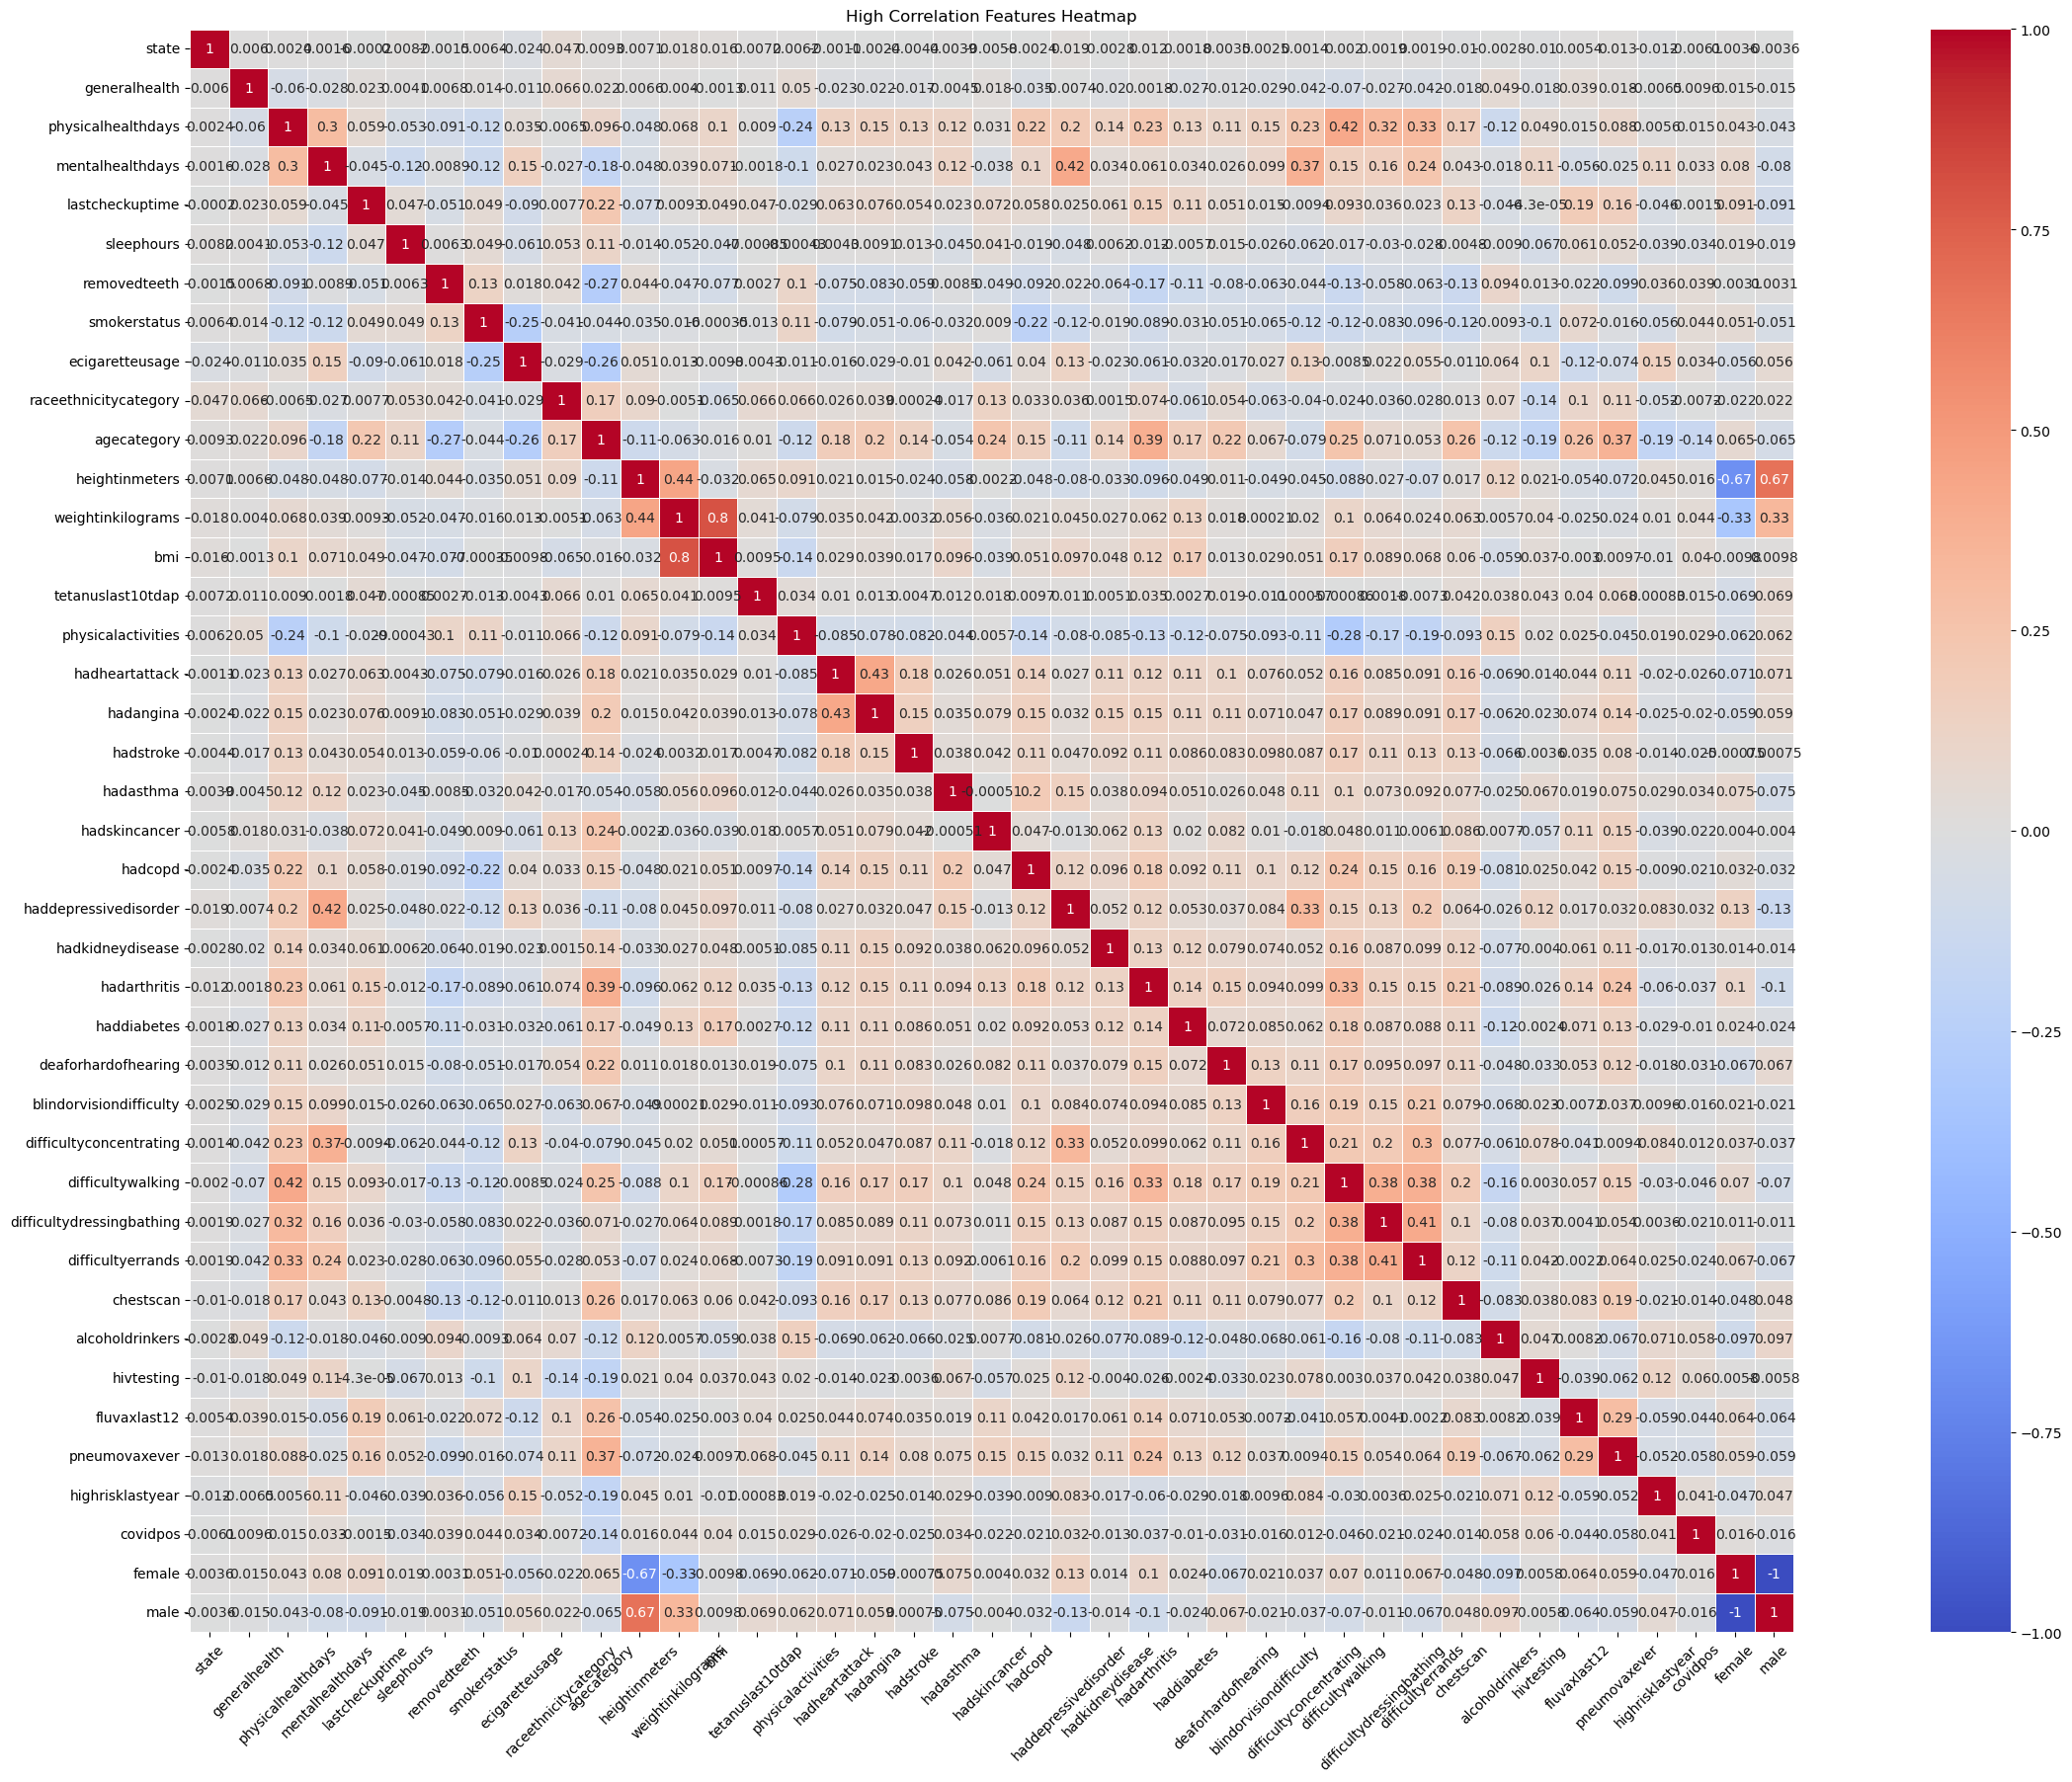

Selected features based on correlation with target hadheartattack: [] which is correlated with more than 0.5


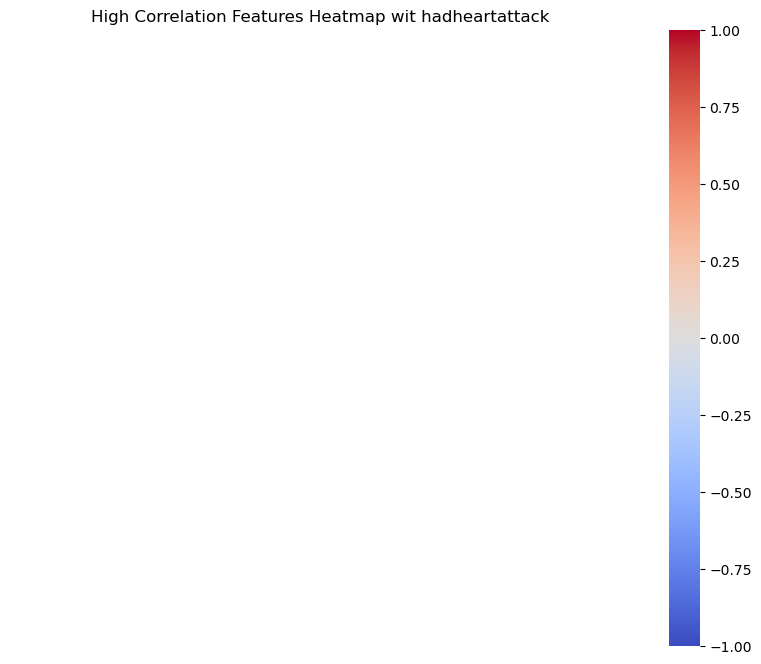

In [97]:
checking_corr_target(data_encoding,'hadheartattack',figure_size=(28,18))

### Logistic Regression

In [870]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [872]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [228]:
lr = LogisticRegression()

Training Accuracy: 0.9459423038050226
Testing Accuracy: 0.947136394263163
Precision: 0.5367039377734565
Recall: 0.19564061669324828
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

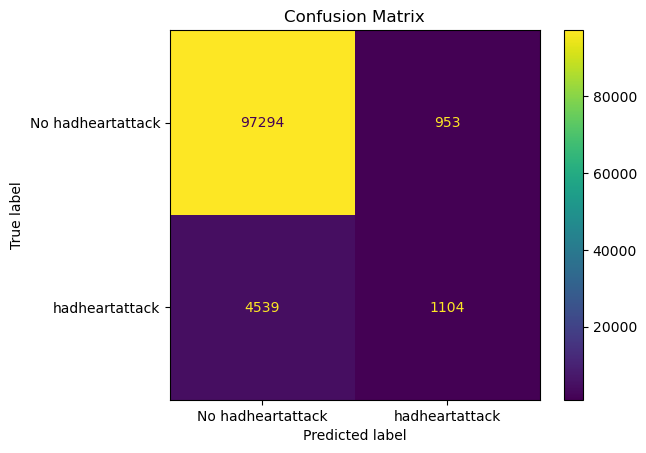

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     98247
           1       0.54      0.20      0.29      5643

    accuracy                           0.95    103890
   macro avg       0.75      0.59      0.63    103890
weighted avg       0.93      0.95      0.94    103890



In [230]:
model_comparision = classification_model(model=lr,model_name='Logistic Regression (All Features, No Scalling)',data=data_encoding,target='hadheartattack')

In [231]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641


### Decision Tree

In [232]:
dt = DecisionTreeClassifier(max_depth=5,max_features=6)

Training Accuracy: 0.9459904320957946
Testing Accuracy: 0.9472422754836847
Precision: 0.5334158415841584
Recall: 0.22913343965975544
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

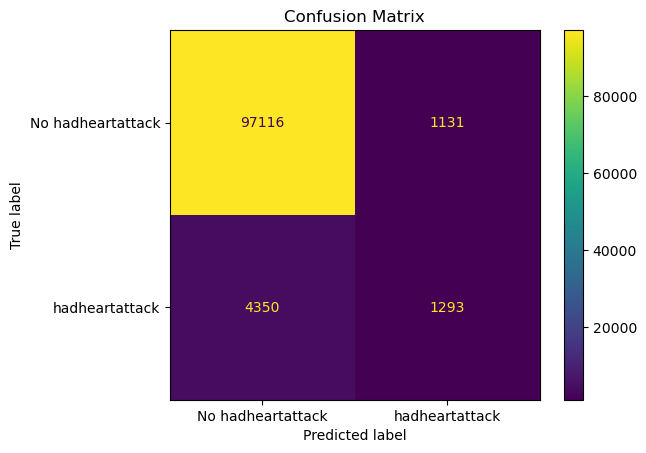

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     98247
           1       0.53      0.23      0.32      5643

    accuracy                           0.95    103890
   macro avg       0.75      0.61      0.65    103890
weighted avg       0.93      0.95      0.94    103890



In [233]:
model_comparision = classification_model(model=dt, model_name='Decision Tree (All Features, No Scalling)', data=data_encoding, target='hadheartattack', results_df=model_comparision)

In [234]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133


### Naive Biase

In [235]:
nb = GaussianNB()

Training Accuracy: 0.8370985699480535
Testing Accuracy: 0.8364616421214747
Precision: 0.20528803698509168
Recall: 0.7003367003367004
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

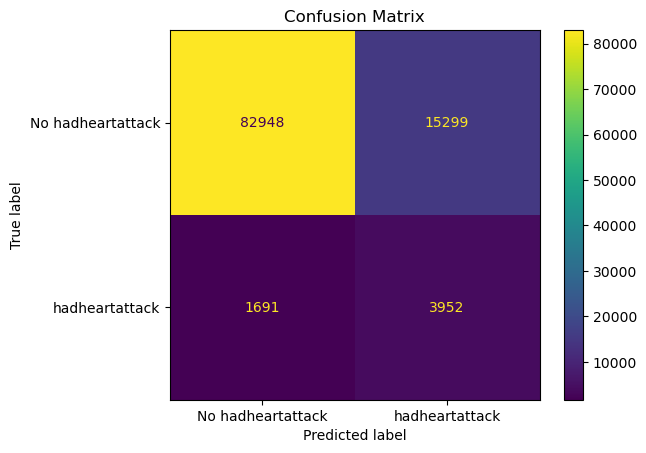

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     98247
           1       0.21      0.70      0.32      5643

    accuracy                           0.84    103890
   macro avg       0.59      0.77      0.61    103890
weighted avg       0.94      0.84      0.88    103890



In [236]:
model_comparision = classification_model(model=nb, model_name='Naive Biase (All Features, No Scalling)',data=data_encoding,target='hadheartattack', results_df=model_comparision)

In [178]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945897,0.947156,0.581296,0.096934
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337


### Random Forest

In [243]:
rf = RandomForestClassifier(max_depth=5,max_features=6, n_estimators = 12)

Training Accuracy: 0.9447262623248531
Testing Accuracy: 0.9467032438155741
Precision: 0.6934306569343066
Recall: 0.03367003367003367
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

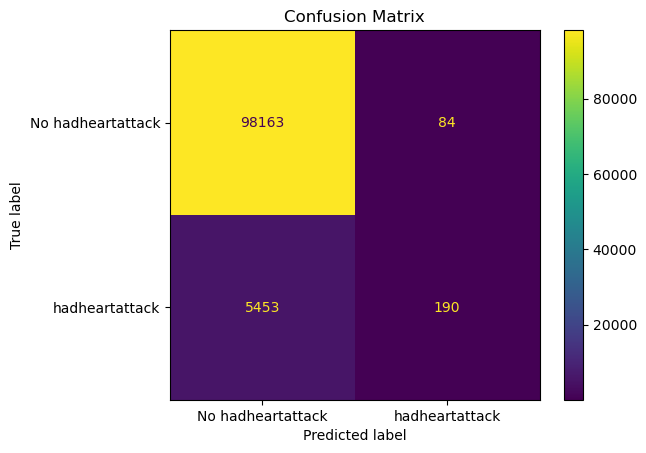

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     98247
           1       0.69      0.03      0.06      5643

    accuracy                           0.95    103890
   macro avg       0.82      0.52      0.52    103890
weighted avg       0.93      0.95      0.92    103890



In [244]:
model_comparision = classification_model(model=rf, model_name='Random Forest (All Features, No Scalling)',data=data_encoding,target='hadheartattack', results_df=model_comparision)

In [247]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670


### XGBoost

In [250]:
xgb = XGBClassifier()

Training Accuracy: 0.9544706369298
Testing Accuracy: 0.9479353161998267
Precision: 0.5510026155187445
Recall: 0.22399432925748716
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

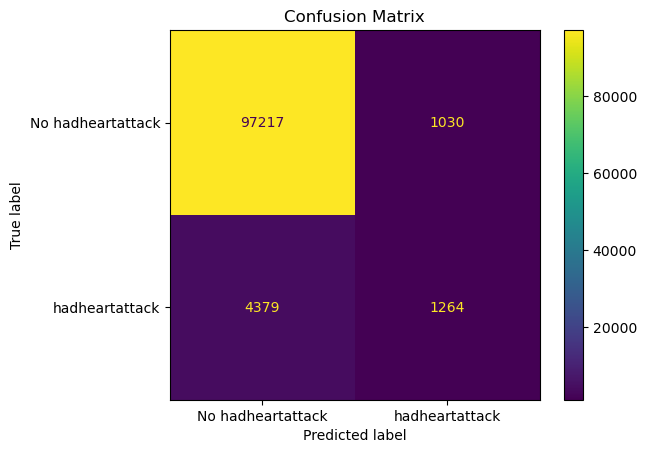

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     98247
           1       0.55      0.22      0.32      5643

    accuracy                           0.95    103890
   macro avg       0.75      0.61      0.65    103890
weighted avg       0.93      0.95      0.94    103890



In [252]:
model_comparision = classification_model(model=xgb, model_name='XGBoost (All Features, No Scalling)',data=data_encoding,target='hadheartattack', results_df=model_comparision)

In [253]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994


## Scaling and trying models

### Scalling preparation

In [193]:
encoding_data_set(s_data)
s_data

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,sleephours,removedteeth,smokerstatus,ecigaretteusage,...,difficultywalking,difficultydressingbathing,difficultyerrands,chestscan,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear,covidpos
0,0,0,4,0.0,0.0,3,8.0,3,3,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0.0,0.0,1,6.0,3,3,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,2.0,3.0,3,5.0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0.0,0.0,3,7.0,3,1,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,1,2.0,0.0,3,9.0,3,3,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,48,0,2,0.0,3.0,1,6.0,3,3,0,...,0,0,0,1,1,1,0,0,0,1
445128,48,0,0,2.0,2.0,3,7.0,3,3,0,...,0,0,0,0,0,1,1,0,0,0
445129,48,0,3,30.0,30.0,0,5.0,0,0,3,...,0,0,0,1,1,0,0,0,0,0
445130,48,1,4,0.0,0.0,3,5.0,3,3,0,...,0,0,0,1,0,1,1,1,0,1


In [195]:
min_max = MinMaxScaler()
col = ['physicalhealthdays','sleephours','weightinkilograms','bmi','mentalhealthdays']
s_data[col] = min_max.fit_transform(s_data[col])

In [197]:
s_data.drop(columns=['state'],inplace=True)
s_data

,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,sleephours,removedteeth,smokerstatus,ecigaretteusage,raceethnicitycategory,...,difficultywalking,difficultydressingbathing,difficultyerrands,chestscan,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear,covidpos
0,0,4,0.000000,0.000000,3,0.304348,3,3,1,4,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0.000000,0.000000,1,0.217391,3,3,0,4,...,0,0,0,0,0,0,0,0,0,0
2,0,4,0.066667,0.100000,3,0.173913,0,3,0,4,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.000000,0.000000,3,0.260870,3,1,0,4,...,0,0,0,1,0,0,1,1,0,0
4,0,1,0.066667,0.000000,3,0.347826,3,3,0,4,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,2,0.000000,0.100000,1,0.217391,3,3,0,0,...,0,0,0,1,1,1,0,0,0,1
445128,0,0,0.066667,0.066667,3,0.260870,3,3,0,0,...,0,0,0,0,0,1,1,0,0,0
445129,0,3,1.000000,1.000000,0,0.173913,0,0,3,0,...,0,0,0,1,1,0,0,0,0,0
445130,1,4,0.000000,0.000000,3,0.173913,3,3,0,0,...,0,0,0,1,0,1,1,1,0,1


### Logistic Regression

In [256]:
clf = LogisticRegression()

Training Accuracy: 0.8361680896597972
Testing Accuracy: 0.8355760900952931
Precision: 0.20443387938607824
Recall: 0.7010455431508064
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

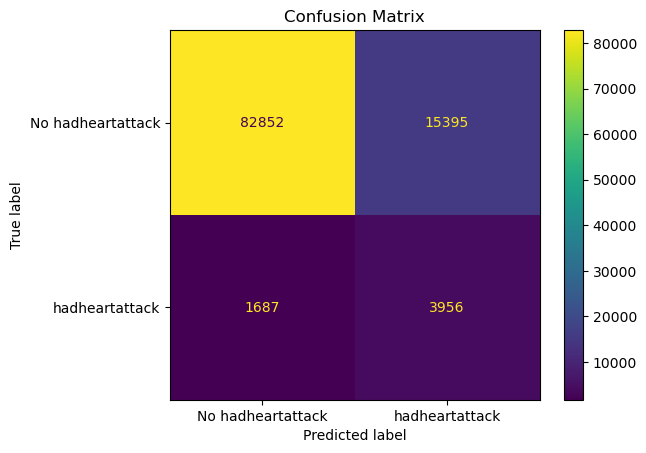

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     98247
           1       0.20      0.70      0.32      5643

    accuracy                           0.84    103890
   macro avg       0.59      0.77      0.61    103890
weighted avg       0.94      0.84      0.87    103890



In [258]:
model_comparision = classification_model(model=nb, model_name='Logistic Regression (All Features, With Scalling)',data=s_data,target='hadheartattack', results_df=model_comparision)

In [259]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Decision Tree

In [262]:
dt = DecisionTreeClassifier(max_depth=5,max_features=6)

Training Accuracy: 0.8361680896597972
Testing Accuracy: 0.8355760900952931
Precision: 0.20443387938607824
Recall: 0.7010455431508064
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

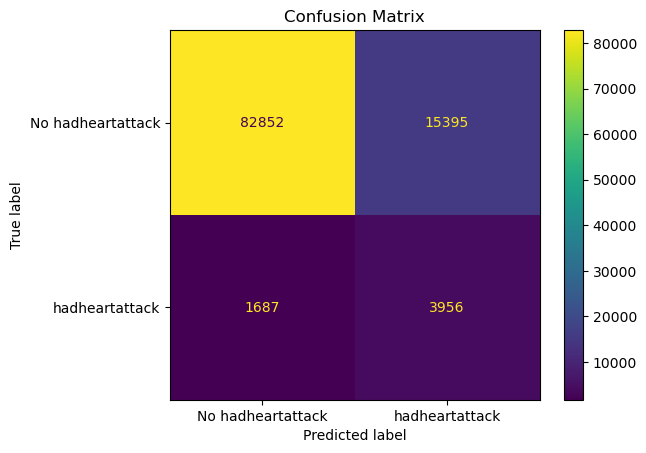

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     98247
           1       0.20      0.70      0.32      5643

    accuracy                           0.84    103890
   macro avg       0.59      0.77      0.61    103890
weighted avg       0.94      0.84      0.87    103890



In [264]:
model_comparision = classification_model(model=nb, model_name='Decision Tree (All Features, With Scalling)',data=s_data,target='hadheartattack', results_df=model_comparision)

In [265]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Naive Biase

In [268]:
nb = GaussianNB()

Training Accuracy: 0.8361680896597972
Testing Accuracy: 0.8355760900952931
Precision: 0.20443387938607824
Recall: 0.7010455431508064
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

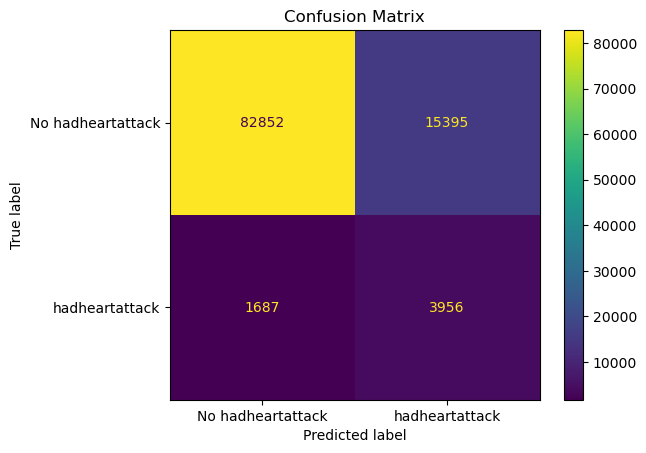

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     98247
           1       0.20      0.70      0.32      5643

    accuracy                           0.84    103890
   macro avg       0.59      0.77      0.61    103890
weighted avg       0.94      0.84      0.87    103890



In [270]:
model_comparision = classification_model(model=nb, model_name='Naive Biase (All Features, With Scalling)',data=s_data,target='hadheartattack', results_df=model_comparision)

In [271]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Random Forest

In [296]:
rf = RandomForestClassifier(max_depth=5,max_features=6, n_estimators = 12)

Training Accuracy: 0.8361680896597972
Testing Accuracy: 0.8355760900952931
Precision: 0.20443387938607824
Recall: 0.7010455431508064
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

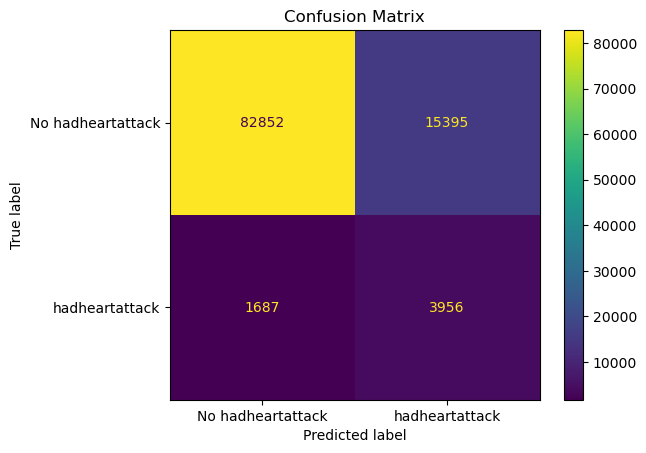

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     98247
           1       0.20      0.70      0.32      5643

    accuracy                           0.84    103890
   macro avg       0.59      0.77      0.61    103890
weighted avg       0.94      0.84      0.87    103890



In [298]:
model_comparision = classification_model(model=nb, model_name='Random Forest (All Features, With Scalling)',data=s_data,target='hadheartattack', results_df=model_comparision)

In [299]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### XGBoost

In [302]:
xgb = XGBClassifier()

Training Accuracy: 0.8361680896597972
Testing Accuracy: 0.8355760900952931
Precision: 0.20443387938607824
Recall: 0.7010455431508064
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

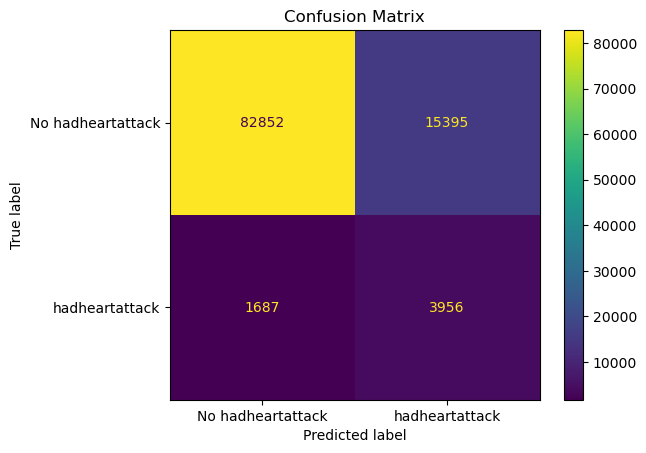

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     98247
           1       0.20      0.70      0.32      5643

    accuracy                           0.84    103890
   macro avg       0.59      0.77      0.61    103890
weighted avg       0.94      0.84      0.87    103890



In [304]:
model_comparision = classification_model(model=nb, model_name='XGBoost (All Features, With Scalling)',data=s_data,target='hadheartattack', results_df=model_comparision)

In [306]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


# SMOTE Data Set

### smote preparation

In [1313]:
pip install imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


- SMOTE cause a problem when the features goes to more than 15 coulmns

### Logistic Regression

In [308]:
lr = LogisticRegression()

Training Accuracy: 0.8025561854110062
Testing Accuracy: 0.8296756184425835
Precision: 0.20610612563402264
Recall: 0.7488924331029594
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

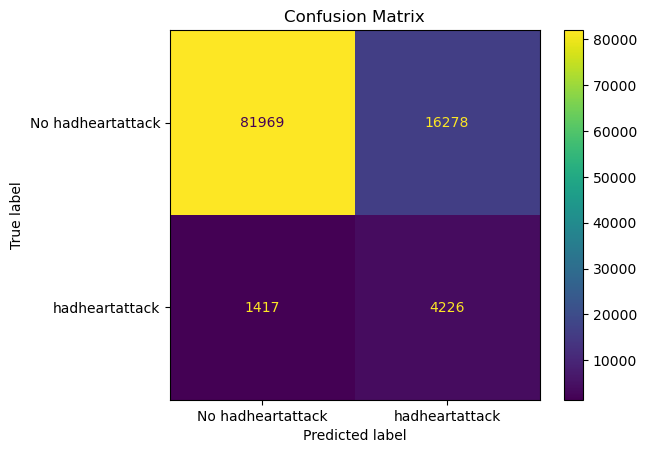

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     98247
           1       0.21      0.75      0.32      5643

    accuracy                           0.83    103890
   macro avg       0.59      0.79      0.61    103890
weighted avg       0.94      0.83      0.87    103890



In [310]:
model_comparision = classification_model(model=lr, model_name='Logistic Regression  (All Features, With Scalling and SMOTE)', smote=True,data=s_data,target='hadheartattack', results_df=model_comparision)

In [312]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Decision Tree

In [314]:
dt = DecisionTreeClassifier(max_depth=5,max_features=6)

Training Accuracy: 0.8119212707135351
Testing Accuracy: 0.7776590624699201
Precision: 0.15356830991505915
Recall: 0.6856282119440014
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

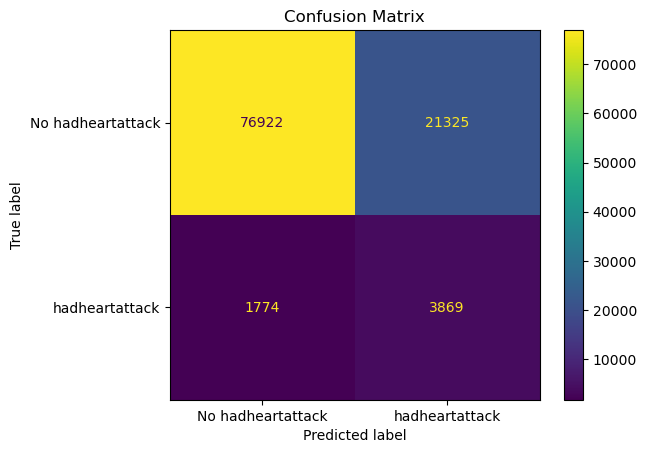

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     98247
           1       0.15      0.69      0.25      5643

    accuracy                           0.78    103890
   macro avg       0.57      0.73      0.56    103890
weighted avg       0.93      0.78      0.84    103890



In [316]:
model_comparision = classification_model(model=dt, model_name='Decision Tree  (All Features, With Scalling and SMOTE)', smote=True,data=s_data,target='hadheartattack', results_df=model_comparision)

In [317]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Naive Biase

In [322]:
nb = GaussianNB()

Training Accuracy: 0.766287733234491
Testing Accuracy: 0.7882183078255848
Precision: 0.17096423830403476
Recall: 0.7531454899875952
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

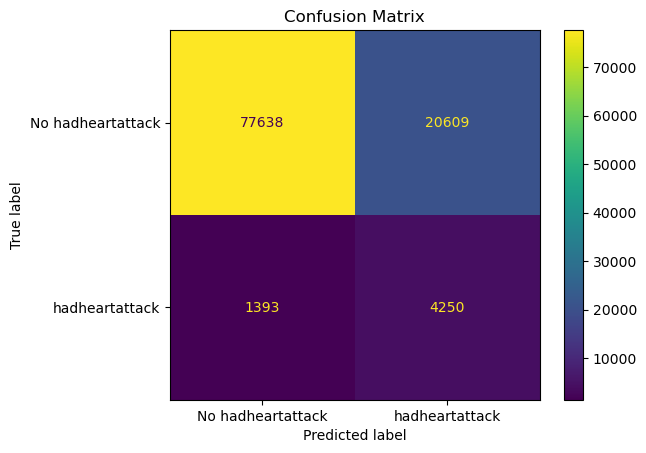

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     98247
           1       0.17      0.75      0.28      5643

    accuracy                           0.79    103890
   macro avg       0.58      0.77      0.58    103890
weighted avg       0.94      0.79      0.84    103890



In [324]:
model_comparision = classification_model(model=nb, model_name='Naive Biase (All Features, With Scalling and SMOTE)', smote=True,data=s_data,target='hadheartattack', results_df=model_comparision)

In [325]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Random Forest

In [328]:
rf = RandomForestClassifier(max_depth=5,max_features=6, n_estimators = 12)

Training Accuracy: 0.8842235378531035
Testing Accuracy: 0.8677639811338916
Precision: 0.24056150246779054
Recall: 0.6650717703349283
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

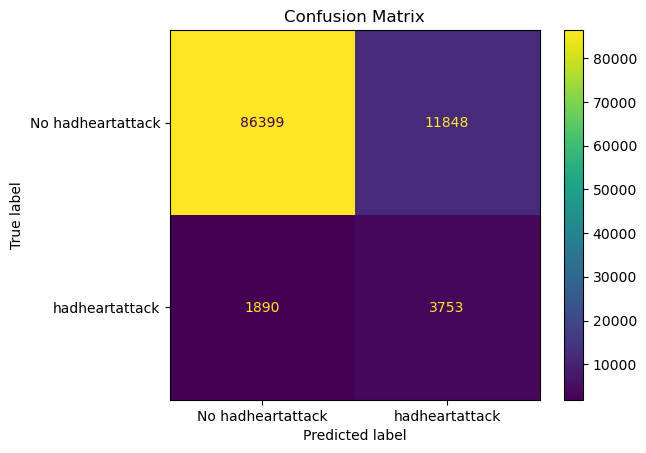

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     98247
           1       0.24      0.67      0.35      5643

    accuracy                           0.87    103890
   macro avg       0.61      0.77      0.64    103890
weighted avg       0.94      0.87      0.90    103890



In [330]:
model_comparision = classification_model(model=rf, model_name='Random Forest (All Features, With Scalling and SMOTE)', smote=True,data=s_data,target='hadheartattack', results_df=model_comparision)

In [332]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### XGBoost

In [335]:
xgb = XGBClassifier()

Training Accuracy: 0.9733329706091386
Testing Accuracy: 0.9475021657522379
Precision: 0.5382126971289931
Recall: 0.23586744639376217
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

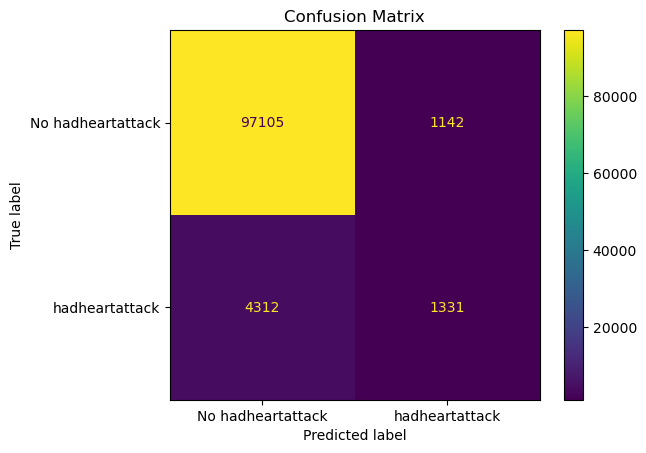

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     98247
           1       0.54      0.24      0.33      5643

    accuracy                           0.95    103890
   macro avg       0.75      0.61      0.65    103890
weighted avg       0.93      0.95      0.94    103890



In [337]:
model_comparision = classification_model(model=xgb, model_name='XGBoost (All Features, With Scalling and SMOTE)', smote=True,data=s_data,target='hadheartattack', results_df=model_comparision)

In [338]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


## Feature Selection using Chi2

- ranking the selected features by chi2

- SMOTE accepts 15 columns

### Logistic Regression

In [341]:
lr = LogisticRegression()

Training Accuracy: 0.7842578833002914
Testing Accuracy: 0.8266050630474541
Precision: 0.2001260483831871
Recall: 0.7315257841573631
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

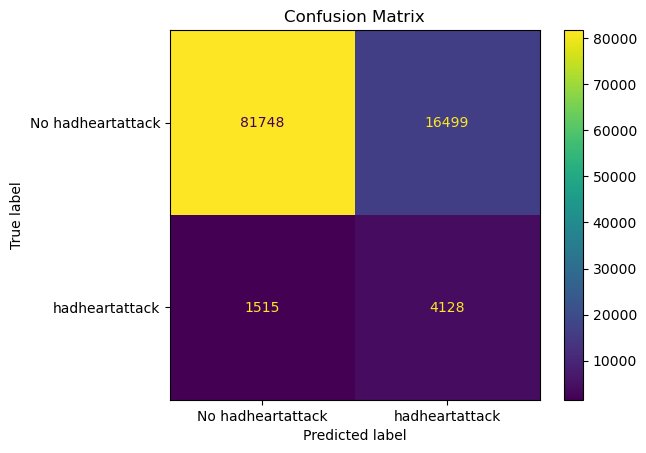

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     98247
           1       0.20      0.73      0.31      5643

    accuracy                           0.83    103890
   macro avg       0.59      0.78      0.61    103890
weighted avg       0.94      0.83      0.87    103890



In [343]:
model_comparision = classification_model(model=lr, model_name='Logistic Regression (All Features, With Scalling and SMOTE and Feature Selection (Chi2))', smote=True, data=s_data, target='hadheartattack', results_df=model_comparision,feature_selection= True)

In [345]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Decision Tree

In [347]:
dt = DecisionTreeClassifier(max_depth=5,max_features=6)

Training Accuracy: 0.7743997197955595
Testing Accuracy: 0.8362210029839253
Precision: 0.2003267629387583
Recall: 0.6735778841041999
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

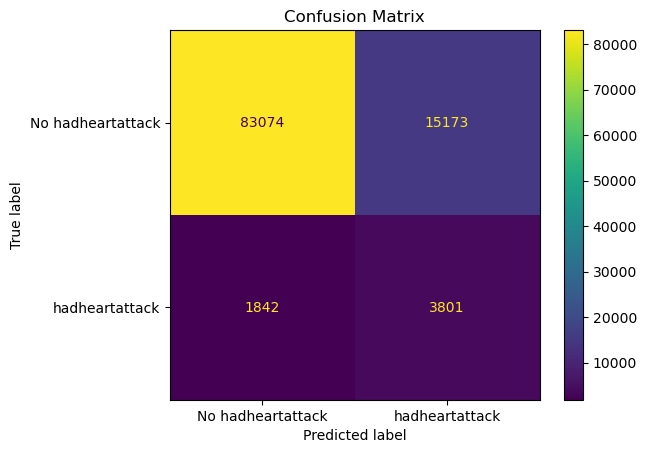

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     98247
           1       0.20      0.67      0.31      5643

    accuracy                           0.84    103890
   macro avg       0.59      0.76      0.61    103890
weighted avg       0.94      0.84      0.87    103890



In [349]:
model_comparision = classification_model(model=dt, model_name='Decision Tree (All Features, With Scalling and SMOTE and Feature Selection (Chi2))', smote=True, data=s_data, target='hadheartattack', results_df=model_comparision,feature_selection= True)

In [352]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Naive Biase

In [354]:
nb = GaussianNB()

Training Accuracy: 0.7686290045601233
Testing Accuracy: 0.8117335643469054
Precision: 0.18635052289938694
Recall: 0.732589048378522
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

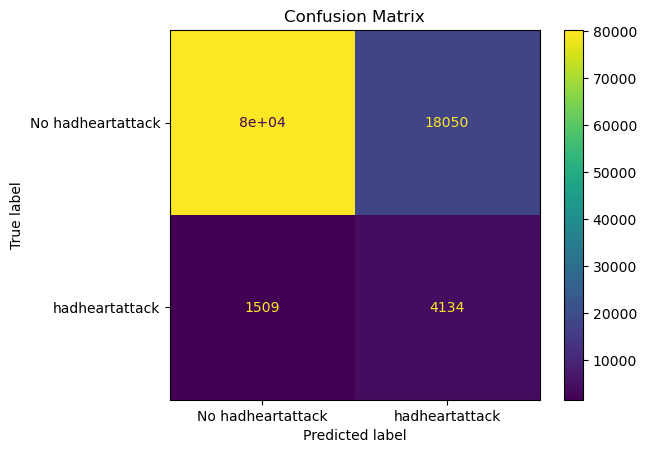

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     98247
           1       0.19      0.73      0.30      5643

    accuracy                           0.81    103890
   macro avg       0.58      0.77      0.59    103890
weighted avg       0.94      0.81      0.86    103890



In [356]:
model_comparision = classification_model(model=nb, model_name='Naive Biase (All Features, With Scalling and SMOTE and Feature Selection (Chi2))', smote=True, data=s_data, target='hadheartattack', results_df=model_comparision,feature_selection= True)

In [358]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### Random Forest

In [360]:
rf = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=200, random_state=42)


Training Accuracy: 0.8683685232477871
Testing Accuracy: 0.8605063047454038
Precision: 0.21177773434955377
Recall: 0.5761119971646288
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

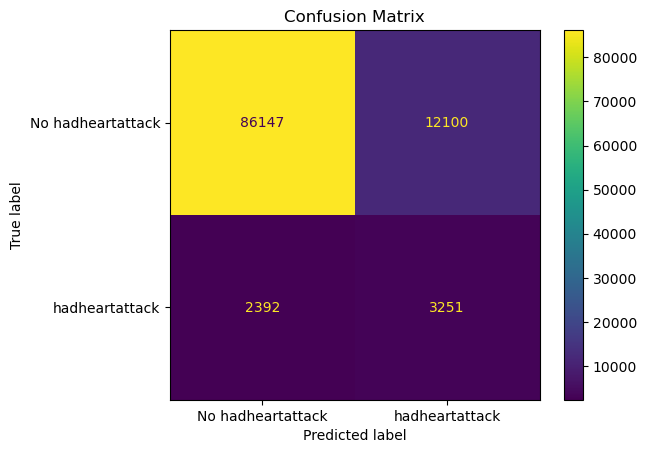

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     98247
           1       0.21      0.58      0.31      5643

    accuracy                           0.86    103890
   macro avg       0.59      0.73      0.62    103890
weighted avg       0.93      0.86      0.89    103890



In [362]:
model_comparision = classification_model(model=rf, model_name='Random Forest (All Features, With Scalling and SMOTE and Feature Selection (Chi2))', smote=True, data=s_data, target='hadheartattack', results_df=model_comparision,feature_selection= True)

In [368]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046


### XGBoost

In [370]:
xgb = XGBClassifier()

Training Accuracy: 0.7686290045601233
Testing Accuracy: 0.8117335643469054
Precision: 0.18635052289938694
Recall: 0.732589048378522
----------------------------------------------------------


<Figure size 800x600 with 0 Axes>

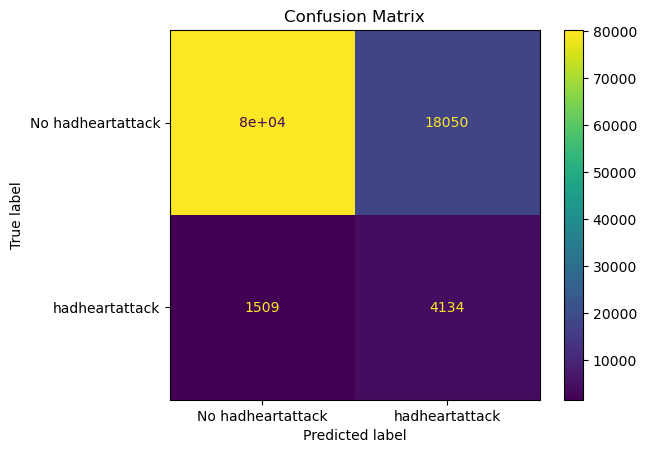

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     98247
           1       0.19      0.73      0.30      5643

    accuracy                           0.81    103890
   macro avg       0.58      0.77      0.59    103890
weighted avg       0.94      0.81      0.86    103890



In [372]:
model_comparision = classification_model(model=nb, model_name='XGBoost (All Features, With Scalling and SMOTE and Feature Selection (Chi2))', smote=True, data=s_data, target='hadheartattack', results_df=model_comparision,feature_selection= True)

In [373]:
model_comparision

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,"Logistic Regression (All Features, No Scalling)",0.945942,0.947136,0.536704,0.195641
1,"Decision Tree (All Features, No Scalling)",0.945990,0.947242,0.533416,0.229133
2,"Naive Biase (All Features, No Scalling)",0.837099,0.836462,0.205288,0.700337
3,"Random Forest (All Features, No Scalling)",0.944726,0.946703,0.693431,0.033670
4,"XGBoost (All Features, No Scalling)",0.954471,0.947935,0.551003,0.223994
5,"Logistic Regression (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
6,"Decision Tree (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
7,"Naive Biase (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
8,"Random Forest (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
9,"XGBoost (All Features, With Scalling)",0.836168,0.835576,0.204434,0.701046
